# Baseline model

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from hms.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, DropoutLayer, BatchNormalizationLayer
from hms.errors import CrossEntropyError, CrossEntropySoftmaxError, SumOfSquaredDiffsError, L1Error
from hms.models import SingleLayerModel, MultipleLayerModel
from hms.initialisers import UniformInit, GlorotUniformInit, ConstantInit
from hms.learning_rules import GradientDescentLearningRule, AdamLearningRule
from hms.data_providers import HMSDataProvider, HMS300dDataProvider
from hms.optimisers import Optimiser
from hms.penalties import L1Penalty, L2Penalty
import seaborn as sns;
from scipy.ndimage import gaussian_filter

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Seed a random number generator
seed = 6102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = HMS300dDataProvider('train', 'intro', 'Wiki', rng=rng)
valid_data = HMS300dDataProvider('validation', 'intro', 'Wiki', rng=rng)
input_dim, output_dim = 300, 6

## L1

In [3]:
motion_data = np.load('data/Wiki/validation_intro.npz')['targets']
batch_size = 100  
init_scale = 0.01  
learning_rate = 0.001  
num_epochs = 10
stats_interval = 1 
weight_penalty = L2Penalty(1e-5)
hidden_dim = 150

rng.seed(seed)
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

weights_init = GlorotUniformInit(rng=rng, gain=2.**0.5)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weight_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weight_penalty),
])

error = L1Error()
learning_rule = AdamLearningRule(learning_rate=learning_rate)
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser_L1 = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors)

stats_L1, keys_L1, run_time_L1 = optimiser_L1.train(num_epochs=num_epochs, stats_interval=stats_interval)



Epoch Progress: 100%|██████████| 3862/3862 [00:10<00:00, 376.80it/s]Epoch 1: 10.3s to complete
    error(train)=4.74e-01, acc(train)=2.65e-01, error(valid)=4.57e-01, acc(valid)=1.98e-01
Epoch Progress:  20%|█▉        | 755/3862 [00:01<00:07, 410.15it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:09<00:00, 391.44it/s]Epoch 2: 9.9s to complete
    error(train)=4.63e-01, acc(train)=3.31e-01, error(valid)=4.63e-01, acc(valid)=2.51e-01
Epoch Progress:  44%|████▍     | 1716/3862 [00:04<00:05, 408.85it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:08<00:00, 437.51it/s]
Epoch 3: 9.5s to complete
    error(train)=4.54e-01, acc(train)=3.16e-01, error(valid)=4.71e-01, acc(valid)=2.09e-01
Epoch Progress:  67%|██████▋   | 2590/3862 [00:06<00:03, 385.89it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:09<00:00, 386.40it/s]Epoch 4: 10.0s to complete
    error(train)=4.48e-01, acc(train)=3.54e-01, error(valid)=4.79e-01, acc(valid)=2.26e-01
Epoch Progress:  90%|█████████ | 3494/3862 [00:08<00:00, 415.08it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:09<00:00, 389.84it/s]Epoch 5: 10.0s to complete
    error(train)=4.42e-01, acc(train)=3.47e-01, error(valid)=4.77e-01, acc(valid)=2.09e-01
Epoch Progress: 100%|██████████| 3862/3862 [00:10<00:00, 363.91it/s]Epoch 6: 10.7s to complete
    error(train)=4.40e-01, acc(train)=3.70e-01, error(valid)=4.88e-01, acc(valid)=2.27e-01
Epoch Progress:   4%|▎         | 136/3862 [00:00<00:11, 316.72it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:11<00:00, 324.22it/s]Epoch 7: 12.0s to complete
    error(train)=4.35e-01, acc(train)=3.60e-01, error(valid)=4.87e-01, acc(valid)=2.11e-01
Epoch Progress:   9%|▉         | 358/3862 [00:00<00:09, 370.40it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:11<00:00, 309.53it/s]
Epoch 8: 12.2s to complete
    error(train)=4.33e-01, acc(train)=3.64e-01, error(valid)=4.91e-01, acc(valid)=2.06e-01
Epoch Progress:  13%|█▎        | 491/3862 [00:01<00:10, 308.39it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:11<00:00, 350.69it/s]Epoch 9: 11.1s to complete
    error(train)=4.32e-01, acc(train)=3.85e-01, error(valid)=4.93e-01, acc(valid)=2.23e-01
Epoch Progress:  29%|██▉       | 1122/3862 [00:02<00:06, 398.18it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:10<00:00, 357.07it/s]Epoch 10: 10.9s to complete
    error(train)=4.29e-01, acc(train)=3.89e-01, error(valid)=4.94e-01, acc(valid)=2.20e-01
Experiment Progress: 100%|██████████| 10/10 [02:16<00:00, 14.40s/it]


Validation Error:    0.000673744785347


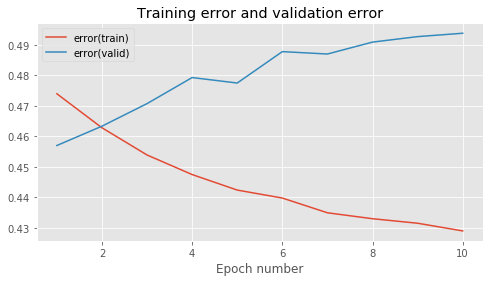

In [4]:
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
# plt.ylim([0.0305, 0.0973])
for k in ['error(train)', 'error(valid)']:
    ax_1.plot(np.arange(1, stats_L1.shape[0]) * stats_interval, 
              stats_L1[1:, keys_L1[k]], label=k)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')
plt.title("Training error and validation error")
plt.savefig("L1 loss TVerror.pdf")

result, evaluation = optimiser_L1.eval_test_set(valid_data, 'validation')
prediction_L1 = result[-1]
print('Validation Error:    ' + str(evaluation['errorvalidation']))

CC of dimension 0  is  -0.000604387963356
CC of dimension 1  is  -9.12923599491e-05
CC of dimension 2  is  0.000610070220822
CC of dimension 3  is  0.00177828858756
CC of dimension 4  is  -0.00112359441898
CC of dimension 5  is  0.00105798733464


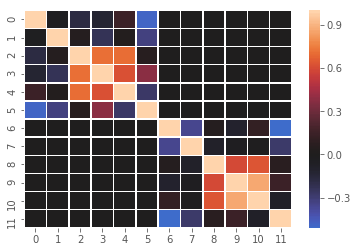

In [5]:
motion_transpose = np.array(motion_data.transpose())
prediction_transpose = np.array(prediction_L1.transpose())

pearson_correlation_coefficient = np.corrcoef(motion_transpose, prediction_transpose)
plot = sns.heatmap(pearson_correlation_coefficient, center=0, linewidths=.5)
fig = plot.get_figure()
fig.savefig("L1 Heatmap")
for i in range(6):
    print("CC of dimension {}".format(i), " is ", pearson_correlation_coefficient[i,i+6])

## L2

Epoch Progress: 100%|██████████| 3862/3862 [00:09<00:00, 397.70it/s]Epoch 1: 9.8s to complete
    error(train)=4.28e-02, acc(train)=3.06e-01, error(valid)=4.44e-02, acc(valid)=2.48e-01
Epoch Progress:  23%|██▎       | 870/3862 [00:02<00:07, 425.13it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:09<00:00, 403.85it/s]Epoch 2: 9.6s to complete
    error(train)=4.06e-02, acc(train)=3.29e-01, error(valid)=4.05e-02, acc(valid)=2.43e-01
Epoch Progress:  33%|███▎      | 1272/3862 [00:04<00:09, 266.79it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:13<00:00, 275.98it/s]Epoch 3: 14.1s to complete
    error(train)=3.85e-02, acc(train)=3.52e-01, error(valid)=4.25e-02, acc(valid)=2.35e-01
Epoch Progress:  29%|██▉       | 1129/3862 [00:03<00:07, 350.55it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:13<00:00, 291.35it/s]Epoch 4: 13.3s to complete
    error(train)=3.75e-02, acc(train)=3.66e-01, error(valid)=4.39e-02, acc(valid)=2.15e-01
Epoch Progress:  27%|██▋       | 1027/3862 [00:02<00:07, 355.22it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:10<00:00, 365.99it/s]Epoch 5: 10.6s to complete
    error(train)=3.63e-02, acc(train)=3.80e-01, error(valid)=4.47e-02, acc(valid)=2.15e-01
Epoch Progress:  39%|███▉      | 1498/3862 [00:04<00:08, 282.96it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:10<00:00, 355.42it/s]Epoch 6: 10.9s to complete
    error(train)=3.56e-02, acc(train)=3.79e-01, error(valid)=4.56e-02, acc(valid)=2.12e-01
Epoch Progress:  52%|█████▏    | 1995/3862 [00:05<00:04, 375.03it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:10<00:00, 363.21it/s]Epoch 7: 10.7s to complete
    error(train)=3.51e-02, acc(train)=3.86e-01, error(valid)=4.65e-02, acc(valid)=2.14e-01
Epoch Progress:  63%|██████▎   | 2423/3862 [00:06<00:03, 372.12it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:10<00:00, 357.39it/s]Epoch 8: 10.9s to complete
    error(train)=3.51e-02, acc(train)=3.87e-01, error(valid)=4.80e-02, acc(valid)=2.19e-01
Epoch Progress:  72%|███████▏  | 2766/3862 [00:07<00:03, 361.36it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:11<00:00, 324.17it/s]Epoch 9: 12.0s to complete
    error(train)=3.47e-02, acc(train)=3.95e-01, error(valid)=4.79e-02, acc(valid)=2.17e-01
Epoch Progress:  64%|██████▍   | 2472/3862 [00:08<00:04, 308.56it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:13<00:00, 291.89it/s]Epoch 10: 13.3s to complete
    error(train)=3.43e-02, acc(train)=3.96e-01, error(valid)=4.76e-02, acc(valid)=2.16e-01
Epoch Progress:  57%|█████▋    | 2198/3862 [00:07<00:05, 303.56it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:12<00:00, 301.48it/s]Epoch 11: 12.9s to complete
    error(train)=3.42e-02, acc(train)=3.92e-01, error(valid)=4.84e-02, acc(valid)=2.09e-01
Epoch Progress:  50%|█████     | 1939/3862 [00:06<00:06, 304.30it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:12<00:00, 302.28it/s]Epoch 12: 12.8s to complete
    error(train)=3.40e-02, acc(train)=3.95e-01, error(valid)=4.86e-02, acc(valid)=2.11e-01
Epoch Progress:  39%|███▉      | 1509/3862 [00:05<00:09, 257.80it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:14<00:00, 265.33it/s]Epoch 13: 14.6s to complete
    error(train)=3.36e-02, acc(train)=4.07e-01, error(valid)=4.87e-02, acc(valid)=2.12e-01
Epoch Progress:  23%|██▎       | 886/3862 [00:03<00:12, 232.60it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:15<00:00, 254.82it/s]Epoch 14: 15.2s to complete
    error(train)=3.38e-02, acc(train)=4.01e-01, error(valid)=4.95e-02, acc(valid)=2.12e-01
Epoch Progress:   6%|▌         | 213/3862 [00:00<00:16, 228.03it/s]


Epoch Progress:  93%|█████████▎| 3602/3862 [00:13<00:01, 242.22it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:15<00:00, 254.00it/s]Epoch 15: 15.3s to complete
    error(train)=3.39e-02, acc(train)=4.03e-01, error(valid)=4.85e-02, acc(valid)=2.08e-01
Epoch Progress:  76%|███████▌  | 2924/3862 [00:10<00:04, 221.27it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:14<00:00, 292.88it/s]
Epoch 16: 15.0s to complete
    error(train)=3.36e-02, acc(train)=4.06e-01, error(valid)=4.87e-02, acc(valid)=2.09e-01
Epoch Progress:  57%|█████▋    | 2204/3862 [00:08<00:07, 211.32it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:14<00:00, 258.17it/s]Epoch 17: 15.0s to complete
    error(train)=3.36e-02, acc(train)=4.04e-01, error(valid)=4.98e-02, acc(valid)=2.20e-01
Epoch Progress:  43%|████▎     | 1658/3862 [00:05<00:07, 303.55it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:12<00:00, 300.34it/s]Epoch 18: 12.9s to complete
    error(train)=3.33e-02, acc(train)=4.10e-01, error(valid)=4.86e-02, acc(valid)=2.11e-01
Epoch Progress:  35%|███▍      | 1347/3862 [00:04<00:10, 244.93it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:14<00:00, 260.97it/s]Epoch 19: 14.9s to complete
    error(train)=3.32e-02, acc(train)=4.05e-01, error(valid)=4.96e-02, acc(valid)=2.03e-01
Epoch Progress:  14%|█▍        | 533/3862 [00:02<00:14, 236.67it/s]


Epoch Progress:  89%|████████▊ | 3419/3862 [00:14<00:02, 205.89it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:17<00:00, 226.08it/s]Epoch 20: 17.2s to complete
    error(train)=3.31e-02, acc(train)=4.08e-01, error(valid)=4.82e-02, acc(valid)=2.18e-01
Epoch Progress:  59%|█████▊    | 2265/3862 [00:09<00:06, 256.08it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:17<00:00, 224.93it/s]Epoch 21: 17.2s to complete
    error(train)=3.32e-02, acc(train)=4.06e-01, error(valid)=4.97e-02, acc(valid)=2.11e-01
Epoch Progress:  29%|██▉       | 1117/3862 [00:05<00:12, 221.44it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:17<00:00, 215.21it/s]Epoch 22: 18.0s to complete
    error(train)=3.29e-02, acc(train)=4.13e-01, error(valid)=4.86e-02, acc(valid)=2.13e-01
Experiment Progress:  73%|███████▎  | 22/30 [06:38<03:05, 23.15s/it]


Epoch Progress:  74%|███████▍  | 2872/3862 [00:11<00:03, 250.22it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:16<00:00, 238.60it/s]Epoch 23: 16.2s to complete
    error(train)=3.33e-02, acc(train)=4.06e-01, error(valid)=4.88e-02, acc(valid)=2.15e-01
Epoch Progress:  51%|█████     | 1970/3862 [00:07<00:07, 249.75it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:15<00:00, 252.15it/s]Epoch 24: 15.4s to complete
    error(train)=3.29e-02, acc(train)=4.09e-01, error(valid)=4.94e-02, acc(valid)=2.20e-01
Epoch Progress:  27%|██▋       | 1045/3862 [00:04<00:11, 248.77it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:15<00:00, 245.90it/s]Epoch 25: 15.8s to complete
    error(train)=3.31e-02, acc(train)=4.02e-01, error(valid)=4.98e-02, acc(valid)=2.15e-01
Epoch Progress:   3%|▎         | 122/3862 [00:00<00:12, 298.18it/s]


Epoch Progress:  94%|█████████▍| 3629/3862 [00:12<00:00, 301.38it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:13<00:00, 286.63it/s]Epoch 26: 13.5s to complete
    error(train)=3.30e-02, acc(train)=4.06e-01, error(valid)=4.89e-02, acc(valid)=2.18e-01
Epoch Progress:  82%|████████▏ | 3159/3862 [00:10<00:02, 303.10it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:13<00:00, 286.96it/s]Epoch 27: 13.5s to complete
    error(train)=3.28e-02, acc(train)=4.10e-01, error(valid)=4.86e-02, acc(valid)=2.13e-01
Epoch Progress:  70%|██████▉   | 2685/3862 [00:09<00:03, 296.49it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:13<00:00, 286.01it/s]Epoch 28: 13.5s to complete
    error(train)=3.28e-02, acc(train)=4.09e-01, error(valid)=4.85e-02, acc(valid)=2.19e-01
Epoch Progress:  51%|█████     | 1973/3862 [00:07<00:07, 250.27it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:15<00:00, 244.90it/s]Epoch 29: 15.8s to complete
    error(train)=3.29e-02, acc(train)=4.05e-01, error(valid)=4.81e-02, acc(valid)=2.17e-01
Epoch Progress:  26%|██▌       | 1007/3862 [00:04<00:11, 244.03it/s]


Epoch Progress: 100%|██████████| 3862/3862 [00:15<00:00, 244.12it/s]Epoch 30: 15.9s to complete
    error(train)=3.26e-02, acc(train)=4.12e-01, error(valid)=4.87e-02, acc(valid)=2.18e-01
Experiment Progress: 100%|██████████| 30/30 [09:33<00:00, 22.14s/it]


Validation Error with dropout:    6.64763307123e-05


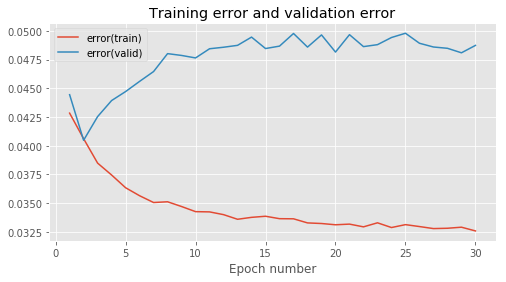

In [6]:
batch_size = 100  
init_scale = 0.01  
learning_rate = 0.001  
num_epochs = 30
stats_interval = 1 
weight_penalty = L2Penalty(1e-5)
hidden_dim = 150

rng.seed(seed)
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

weights_init = GlorotUniformInit(rng=rng, gain=2.**0.5)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weight_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weight_penalty),
])

error = SumOfSquaredDiffsError()
learning_rule = AdamLearningRule(learning_rate=learning_rate)
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser_L2 = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors)

stats_L2, keys_L2, run_time_L2 = optimiser_L2.train(num_epochs=num_epochs, stats_interval=stats_interval)

fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
# plt.ylim([0.0305, 0.0973])
for k in ['error(train)', 'error(valid)']:
    ax_1.plot(np.arange(1, stats_L2.shape[0]) * stats_interval, 
              stats_L2[1:, keys_L2[k]], label=k)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')
plt.title("Training error and validation error")
plt.savefig("L2 loss TVerror.pdf")

result, evaluation = optimiser_L2.eval_test_set(valid_data, 'validation')
prediction_L2 = result[-1]
print('Validation Error with dropout:    ' + str(evaluation['errorvalidation']))

CC of dimension 0  is  -0.00412963186582
CC of dimension 1  is  -0.00392781192174
CC of dimension 2  is  0.00117615803966
CC of dimension 3  is  -0.00103193164853
CC of dimension 4  is  -0.0057002669571
CC of dimension 5  is  0.00212375830651


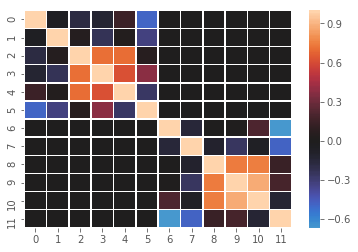

In [7]:
motion_transpose = np.array(motion_data.transpose())
prediction_transpose = np.array(prediction_L2.transpose())

pearson_correlation_coefficient = np.corrcoef(motion_transpose, prediction_transpose)
plot = sns.heatmap(pearson_correlation_coefficient, center=0, linewidths=.5)
fig = plot.get_figure()
fig.savefig("L2 Heatmap")
for i in range(6):
    print("CC of dimension {}".format(i), " is ", pearson_correlation_coefficient[i,i+6])

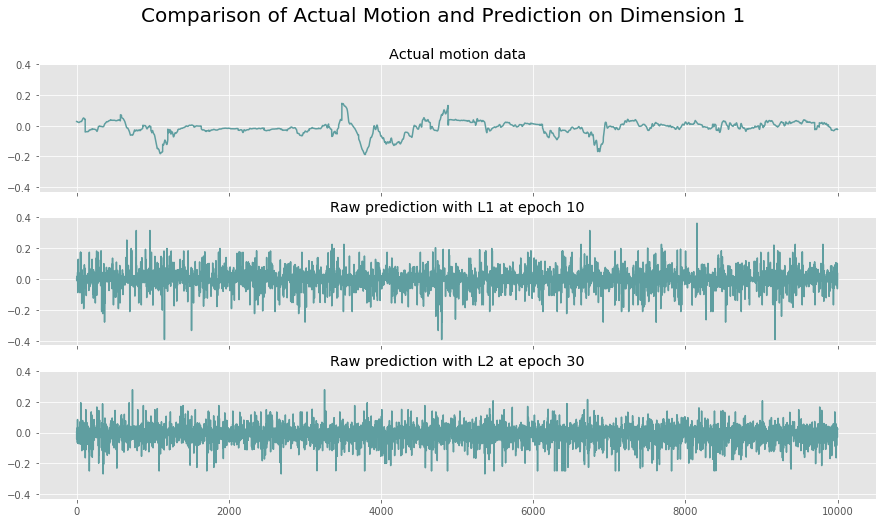

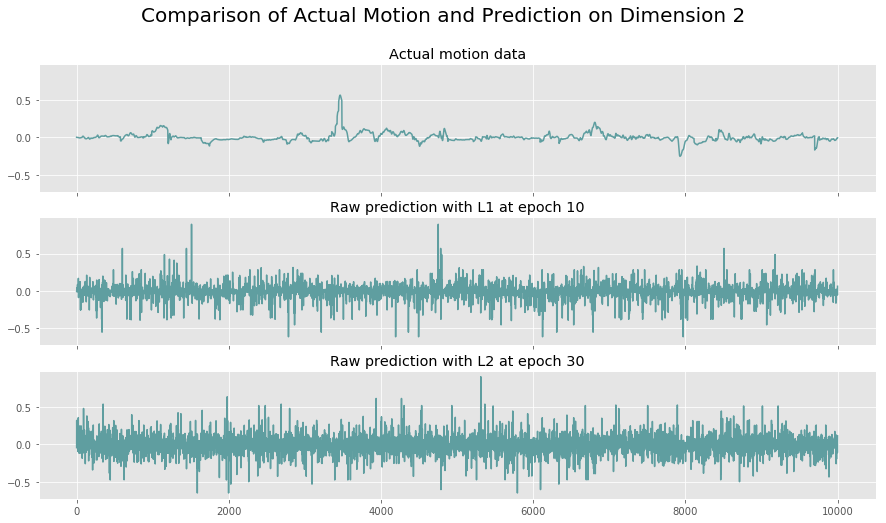

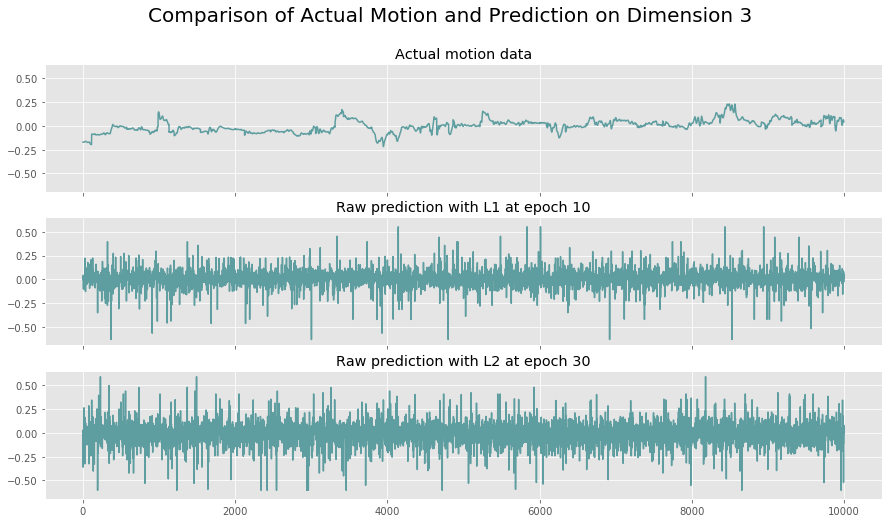

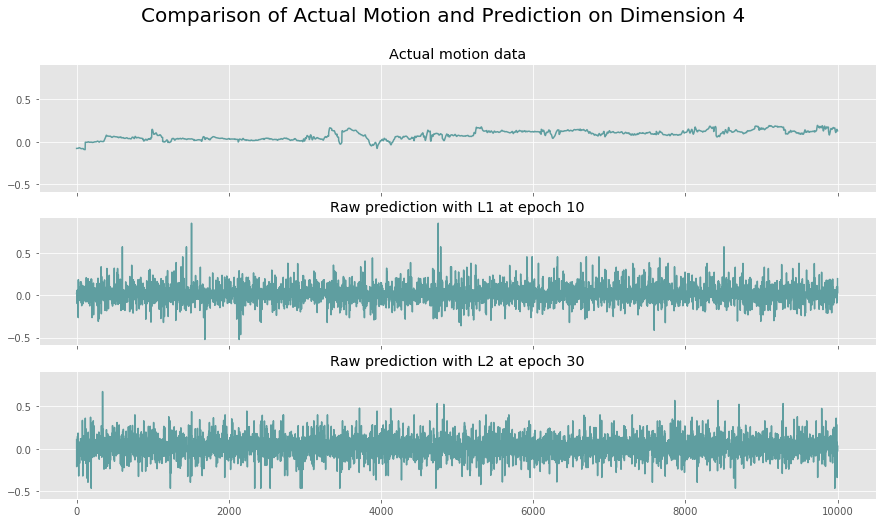

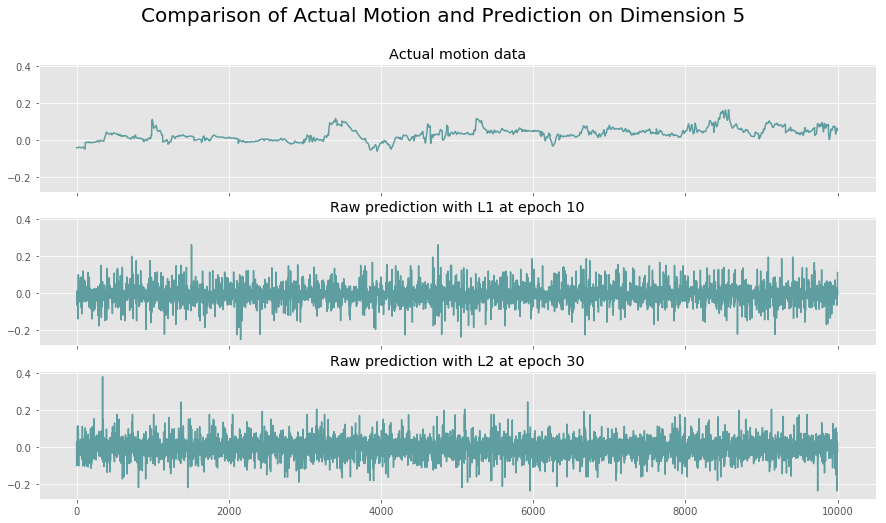

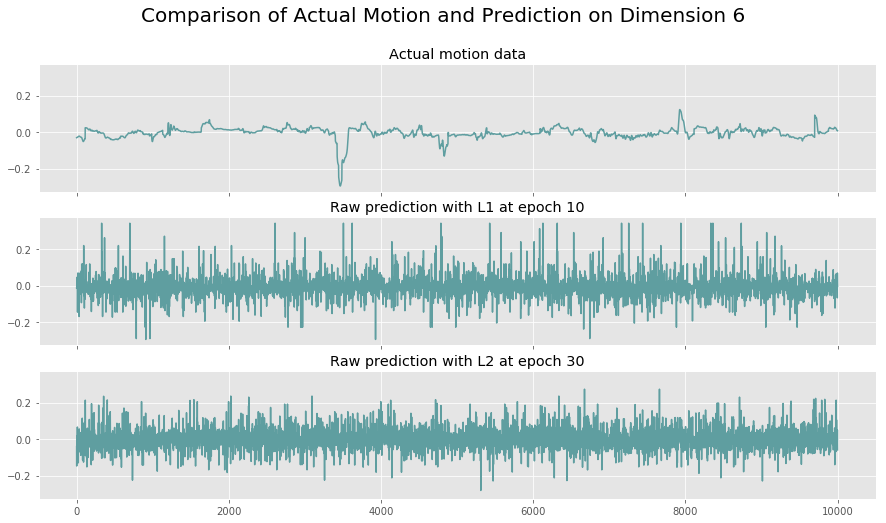

In [8]:
for i in range(6):
    f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(15,8))
    axarr[0].plot(motion_data[:10000,i], color = 'cadetblue')
    axarr[0].set_title('Actual motion data')
    axarr[1].plot(prediction_L1[:10000,i], color = 'cadetblue')
    axarr[1].set_title('Raw prediction with L1 at epoch 10'.format(hidden_dim))
    axarr[2].plot(prediction_L2[:10000,i], color = 'cadetblue')
    axarr[2].set_title('Raw prediction with L2 at epoch 30'.format(hidden_dim))    
    plt.suptitle("Comparison of Actual Motion and Prediction on Dimension {}".format(i+1), size=20)
    plt.savefig("Loss Func Intro ComparisonDim_{0}.pdf".format(i+1))

## Define a function that smooths the output

In [9]:
def smooth_prediction(raw_prediction):
    output_shape = raw_prediction.shape
    # make a matrix that adds 20 lines paddings at the beginning & end of raw prediction
    calculation_frame = np.zeros((output_shape[0]+40, output_shape[1]))
    output = np.zeros(raw_prediction.shape)
    calculation_frame[20:-20, :] = raw_prediction

    for i in range(output_shape[0]):
        output[i,:] = calculation_frame[i+20,:] + \
        0.9 * (calculation_frame[i+21,:] + calculation_frame[i+19,:]) + \
        0.9 * (calculation_frame[i+22,:] + calculation_frame[i+18,:]) + \
        0.8 * (calculation_frame[i+23,:] + calculation_frame[i+17,:]) + \
        0.8 * (calculation_frame[i+24,:] + calculation_frame[i+16,:]) + \
        0.7 * (calculation_frame[i+25,:] + calculation_frame[i+15,:]) + \
        0.7 * (calculation_frame[i+26,:] + calculation_frame[i+14,:]) + \
        0.6 * (calculation_frame[i+27,:] + calculation_frame[i+13,:]) + \
        0.6 * (calculation_frame[i+28,:] + calculation_frame[i+12,:]) + \
        0.5 * (calculation_frame[i+29,:] + calculation_frame[i+11,:]) + \
        0.5 * (calculation_frame[i+30,:] + calculation_frame[i+10,:]) + \
        0.4 * (calculation_frame[i+31,:] + calculation_frame[i+9,:]) + \
        0.4 * (calculation_frame[i+32,:] + calculation_frame[i+8,:]) + \
        0.3 * (calculation_frame[i+33,:] + calculation_frame[i+7,:]) + \
        0.3 * (calculation_frame[i+34,:] + calculation_frame[i+6,:]) + \
        0.2 * (calculation_frame[i+35,:] + calculation_frame[i+5,:]) + \
        0.2 * (calculation_frame[i+36,:] + calculation_frame[i+4,:]) + \
        0.1 * (calculation_frame[i+37,:] + calculation_frame[i+3,:]) + \
        0.1 * (calculation_frame[i+38,:] + calculation_frame[i+2,:]) + \
        0.1 * (calculation_frame[i+39,:] + calculation_frame[i+1,:])
    output /= [2.0, 2.0, 2.0, 3.0, 2.0, 2.0]

    # Adjust motion to origin
#     motion_mean = np.mean(output,axis=0)
#     output = output - motion_mean

    return output

## Produce output of test sets using L1, trained on intro data, test on extro data

Error:    0.00278918937877
Motion length:  31467


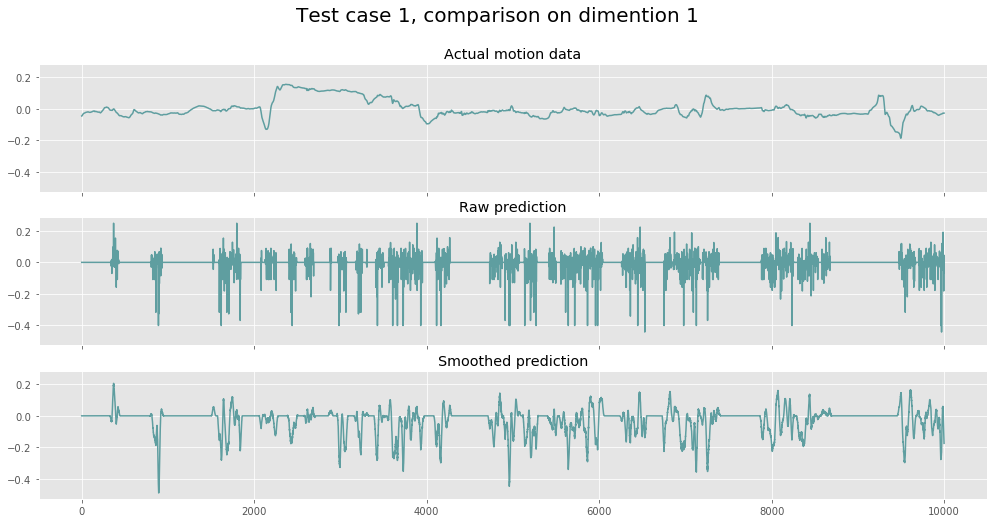

Error:    0.00366191018629
Motion length:  31983


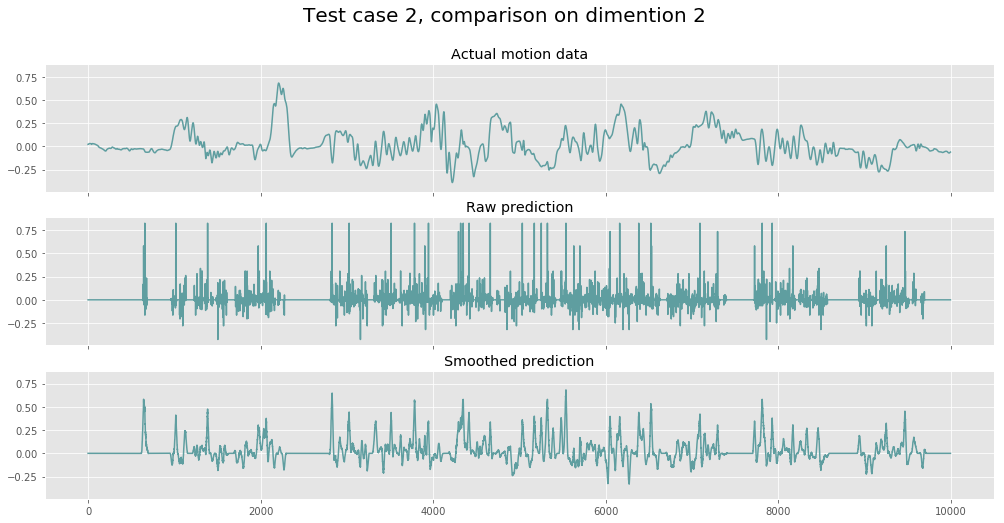

Error:    0.00364647615426
Motion length:  35331


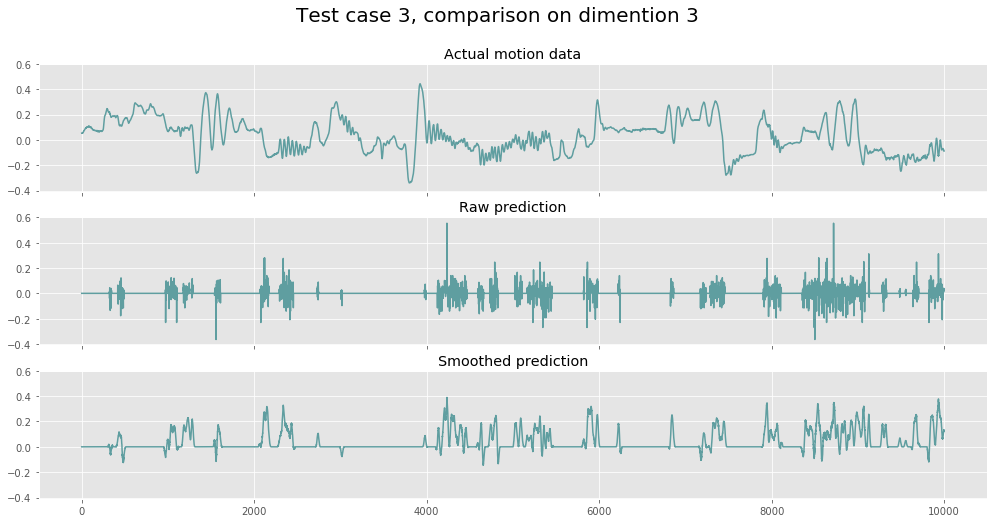

Error:    0.00310275518688
Motion length:  30155


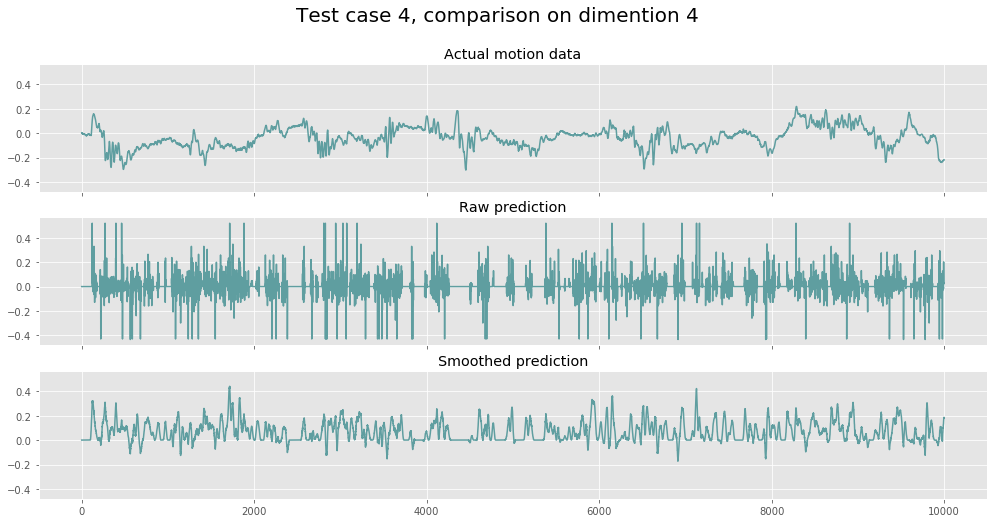

Error:    0.00275260543642
Motion length:  31798


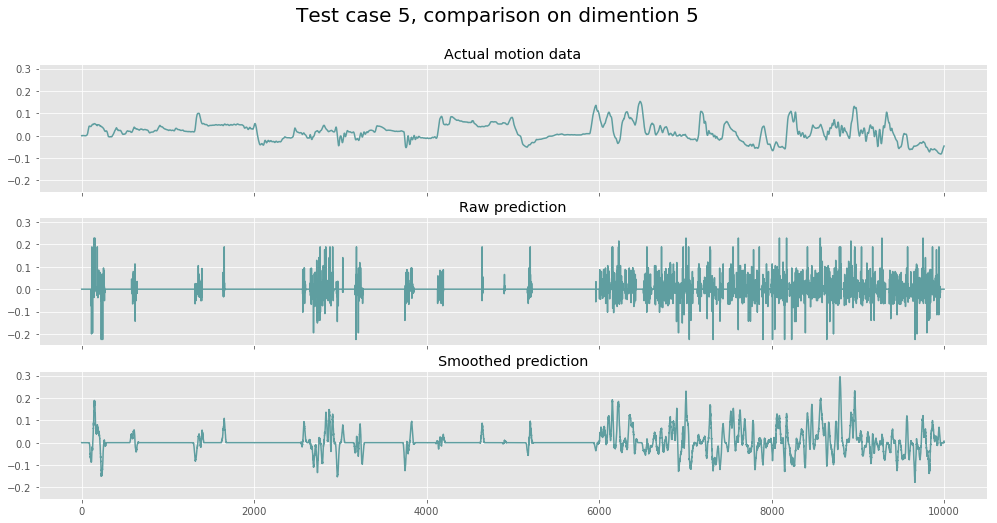

Error:    0.00879494133046
Motion length:  34518


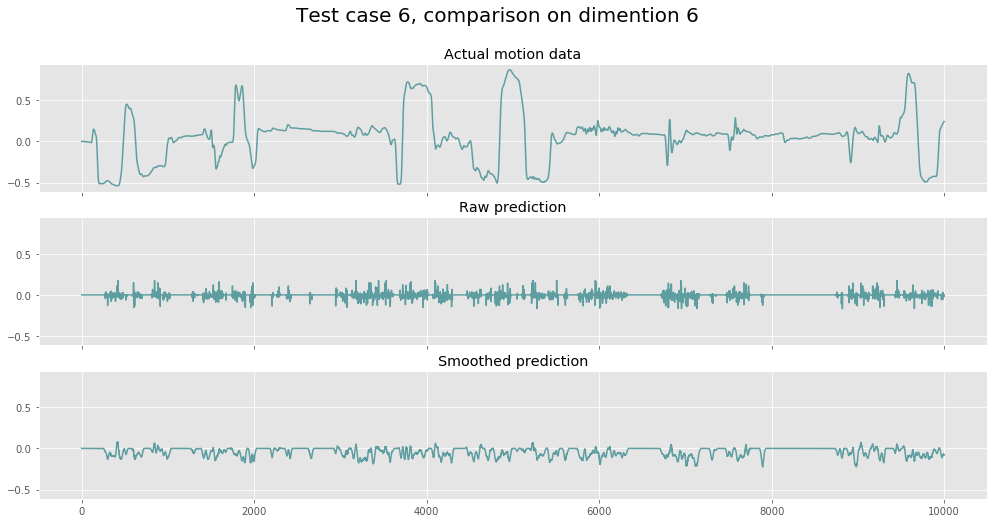

In [11]:
# Loop over 1-6 test cases

for i in range(1,7):
    test_data = HMS300dDataProvider('test{0}'.format(i),'extro', 'Wiki', rng=rng)
    result, evaluation = optimiser_L1.eval_test_set(test_data, 'test')
    print('Error:    ' + str(evaluation['errortest']))
    
    time_intervals = np.loadtxt("ExtrovertRawData/Words/{0}".format(i), usecols=range(4, 6), dtype="int")
    prediction = np.zeros((time_intervals[-1,1] + 300, 6))
    counter = 0
    for line in time_intervals:
        for j in range(line[0], line[1]):
            prediction[j] = result[-1][counter]
            counter += 1
    prediction_smooth = smooth_prediction(prediction)

    np.savetxt('Predictions/300dL1/fake_extro_L1_{0}.txt'.format(i), prediction, fmt="%.7f")
    np.savetxt('Predictions/300dL1/fake_extro_L1_smooth_{0}.txt'.format(i), prediction_smooth, fmt="%.7f")
    
    motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    print("Motion length: ", motion_data.shape[0])

    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(17,8))
    axarr[0].plot(motion_data[:10000,i-1], color = 'cadetblue')
    axarr[0].set_title('Actual motion data')
    axarr[1].plot(prediction[:10000,i-1], color = 'cadetblue')
    axarr[1].set_title('Raw prediction')
    axarr[2].plot(prediction_smooth[:10000,i-1], color = 'cadetblue')
    axarr[2].set_title('Smoothed prediction')
    plt.suptitle('Test case {0}, comparison on dimention {1}'.format(i, i), size = 20)
    plt.savefig('Predictions/300dL1/L1 fake_extro case {0} dim {1}.pdf'.format(i, i))
    plt.show()

## Produce output of test sets using L2, trained on intro data, test on extro data

Error:    0.00278918937877
Motion length:  31467


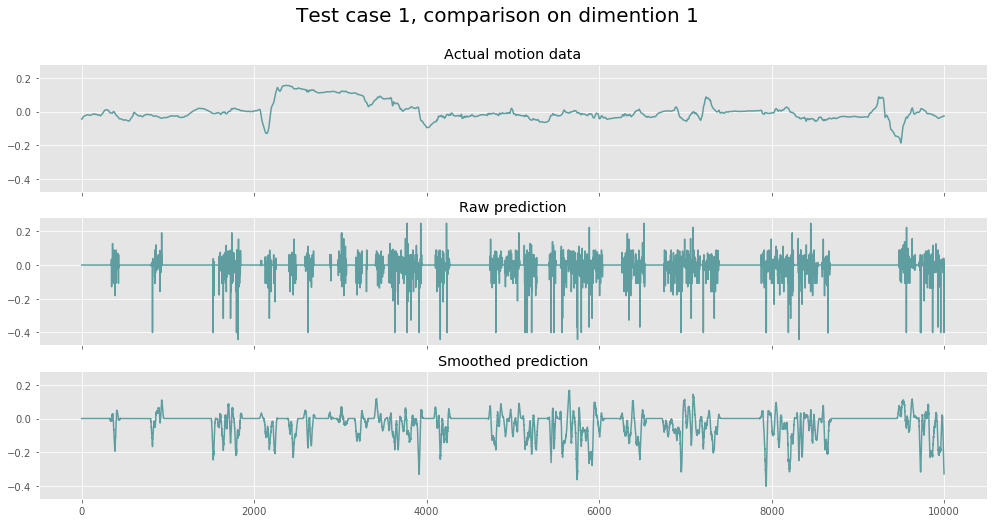

Error:    0.00366191018629
Motion length:  31983


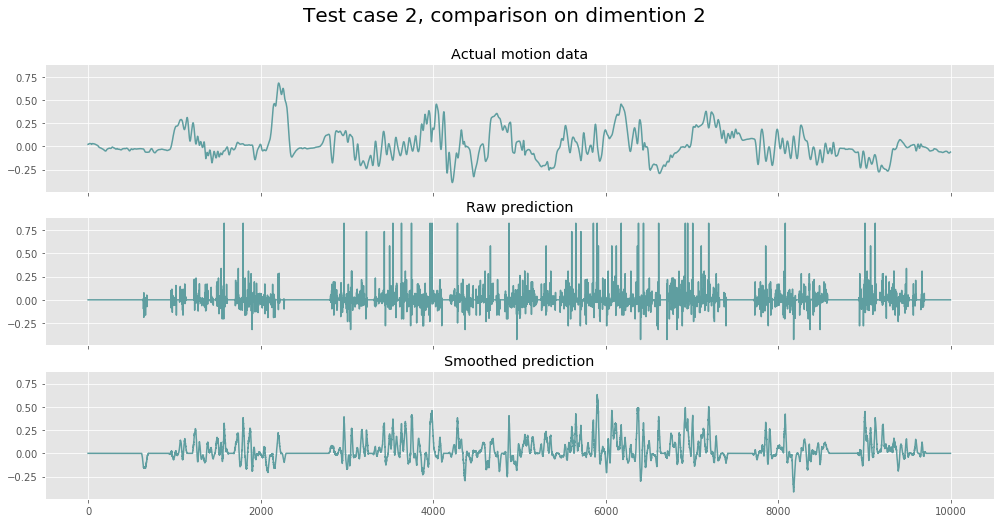

Error:    0.00364647615426
Motion length:  35331


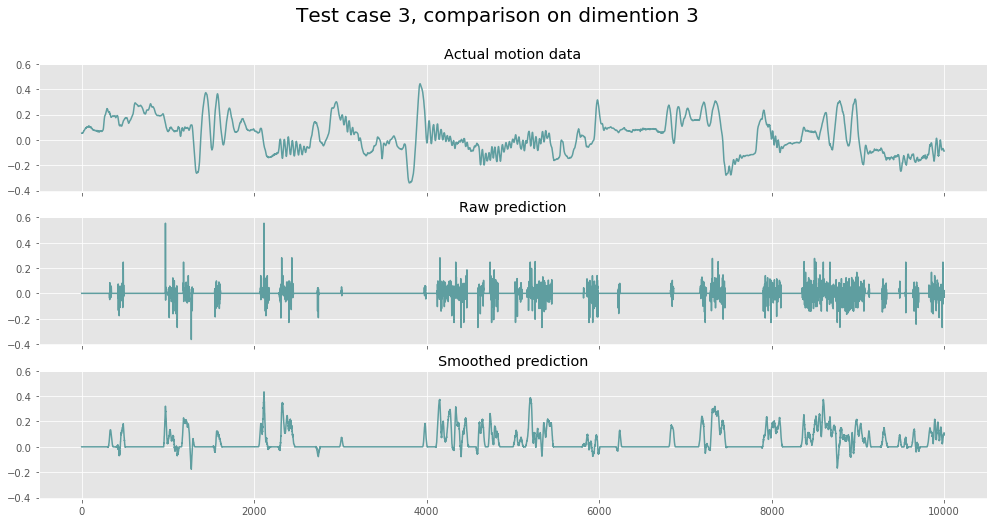

Error:    0.00310275518688
Motion length:  30155


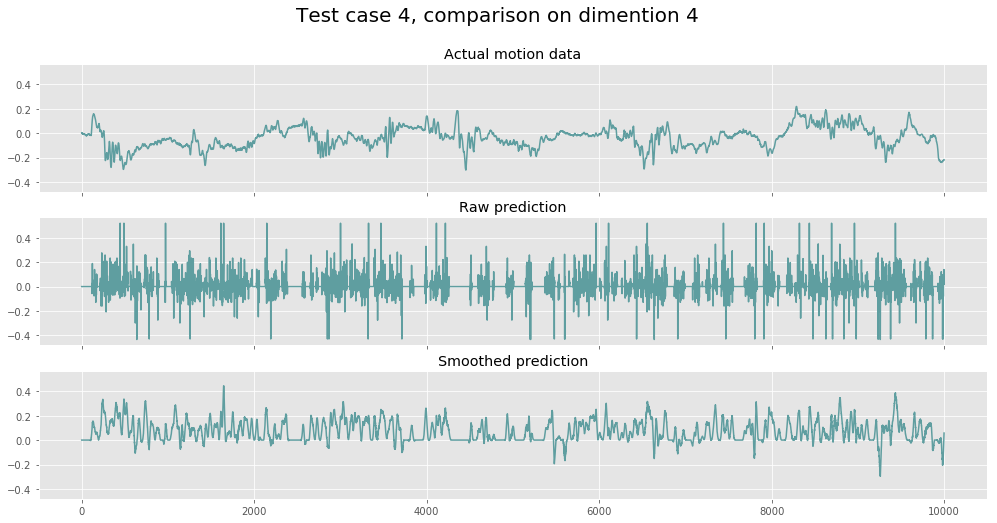

Error:    0.00275260543642
Motion length:  31798


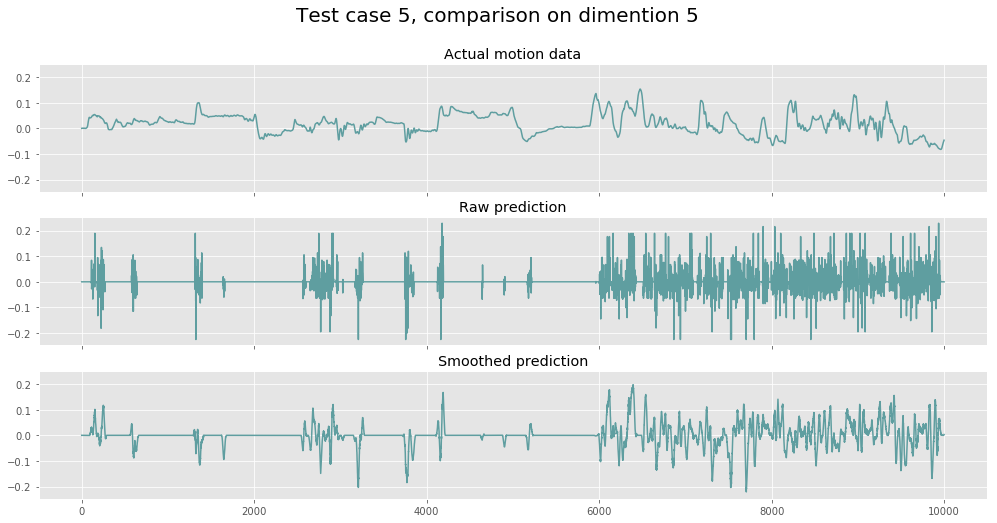

Error:    0.00879494133046
Motion length:  34518


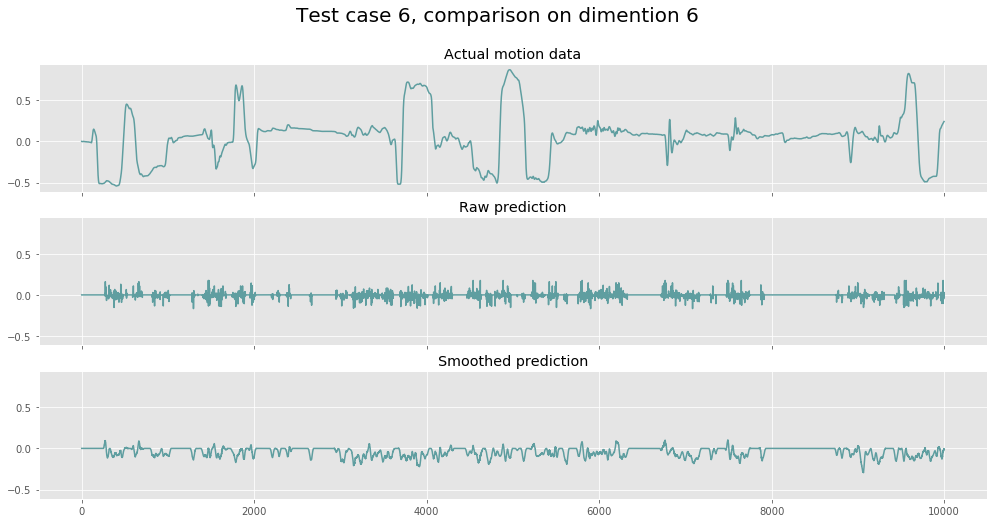

In [12]:
# Loop over 1-6 test cases

for i in range(1,7):
    test_data = HMS300dDataProvider('test{0}'.format(i), 'extro', 'Wiki',  rng=rng)
    result, evaluation = optimiser_L1.eval_test_set(test_data, 'test')
    print('Error:    ' + str(evaluation['errortest']))
    
    time_intervals = np.loadtxt("ExtrovertRawData/Words/{0}".format(i), usecols=range(4, 6), dtype="int")
    prediction = np.zeros((time_intervals[-1,1] + 300, 6))
    counter = 0
    for line in time_intervals:
        for j in range(line[0], line[1]):
            prediction[j] = result[-1][counter]
            counter += 1
    prediction_smooth = smooth_prediction(prediction)

    np.savetxt('Predictions/300dL2/fake_extro_L2_{0}.txt'.format(i), prediction, fmt="%.7f")
    np.savetxt('Predictions/300dL2/fake_extro_L2_smooth_{0}.txt'.format(i), prediction_smooth, fmt="%.7f")
    
    motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    print("Motion length: ", motion_data.shape[0])

    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(17,8))
    axarr[0].plot(motion_data[:10000,i-1], color = 'cadetblue')
    axarr[0].set_title('Actual motion data')
    axarr[1].plot(prediction[:10000,i-1], color = 'cadetblue')
    axarr[1].set_title('Raw prediction')
    axarr[2].plot(prediction_smooth[:10000,i-1], color = 'cadetblue')
    axarr[2].set_title('Smoothed prediction')
    plt.suptitle('Test case {0}, comparison on dimention {1}'.format(i, i), size = 20)
    plt.savefig('Predictions/300dL2/L2 fake_extro case {0} dim {1}.pdf'.format(i, i))
    plt.show()

## Compare L1 and L2 test cases

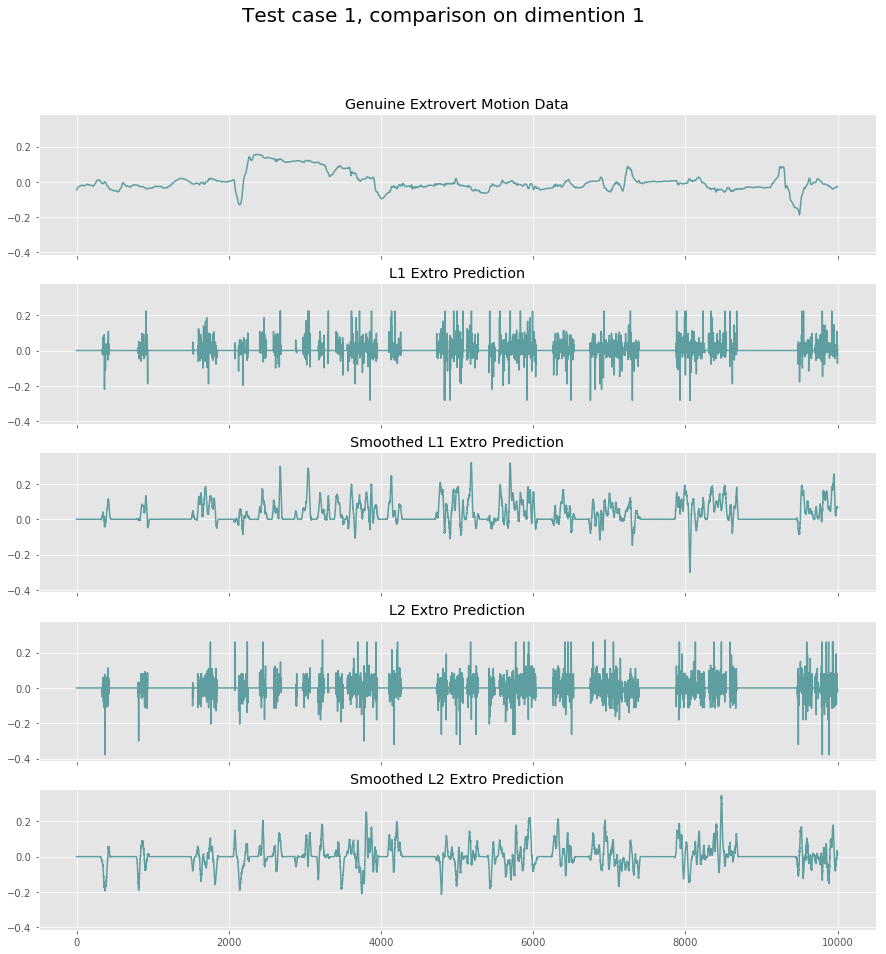

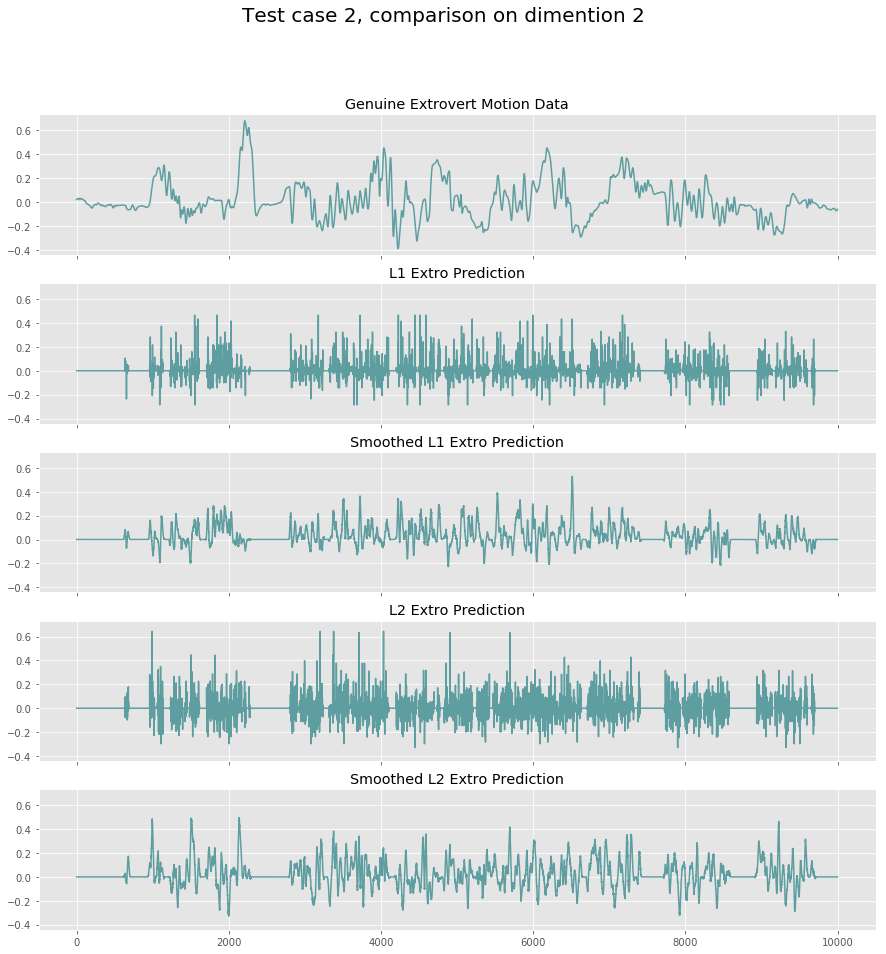

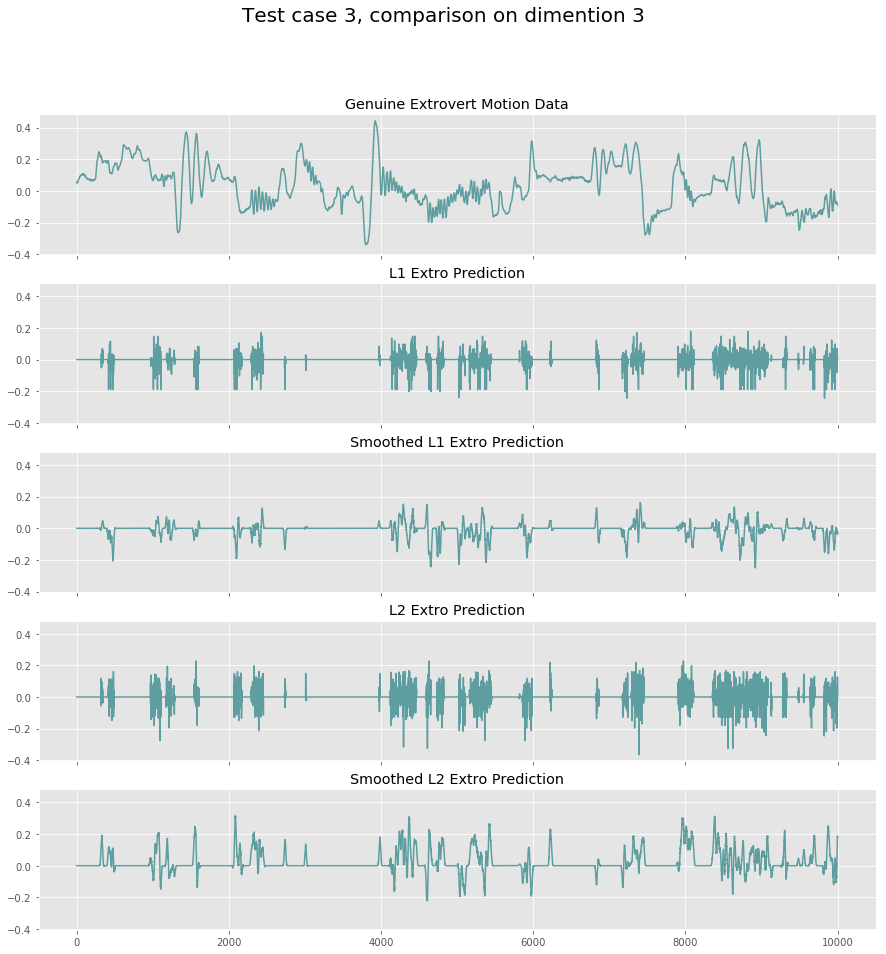

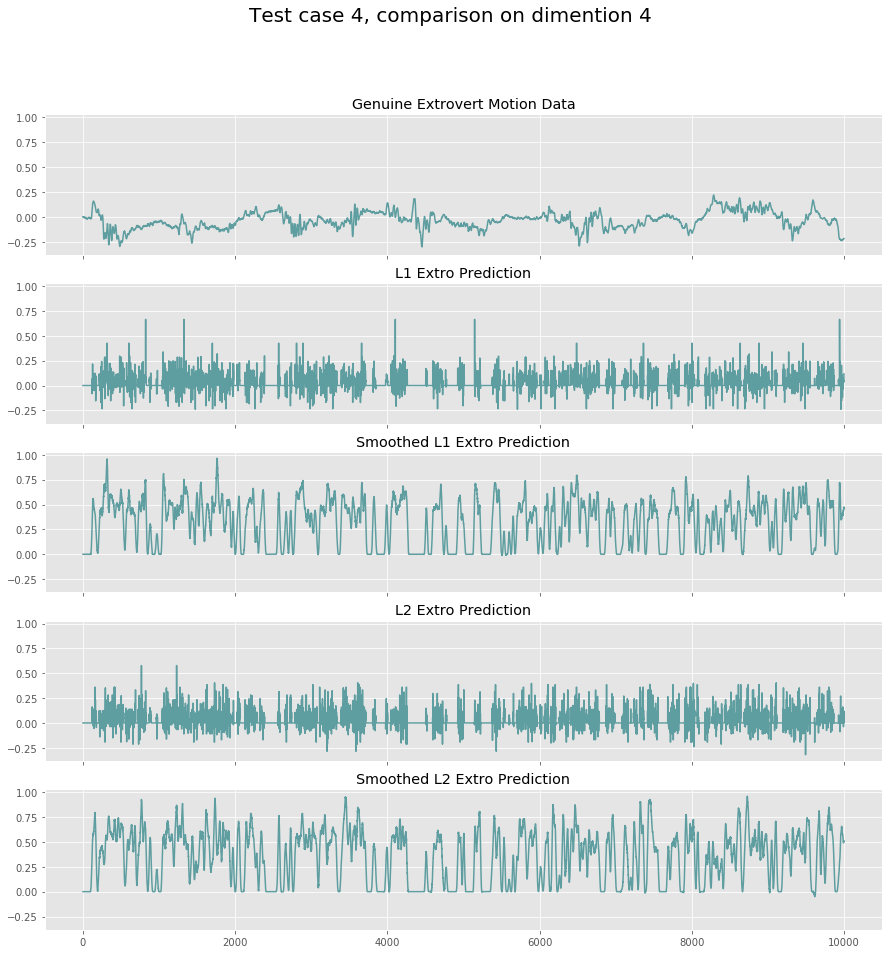

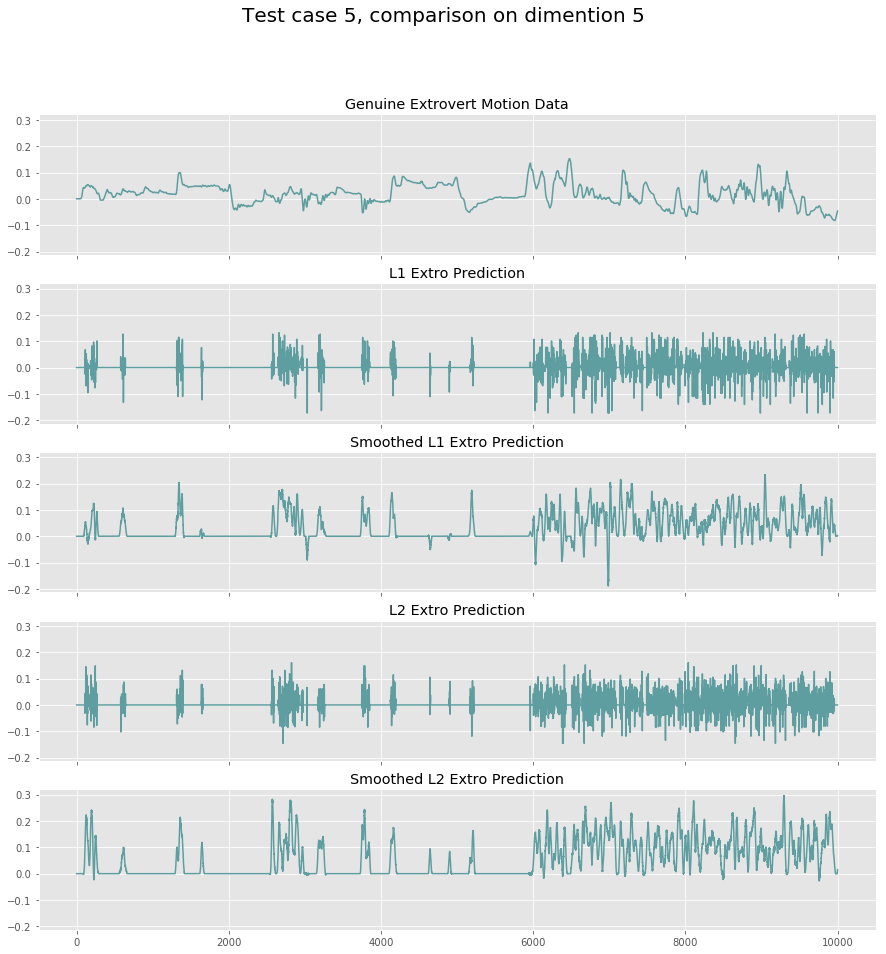

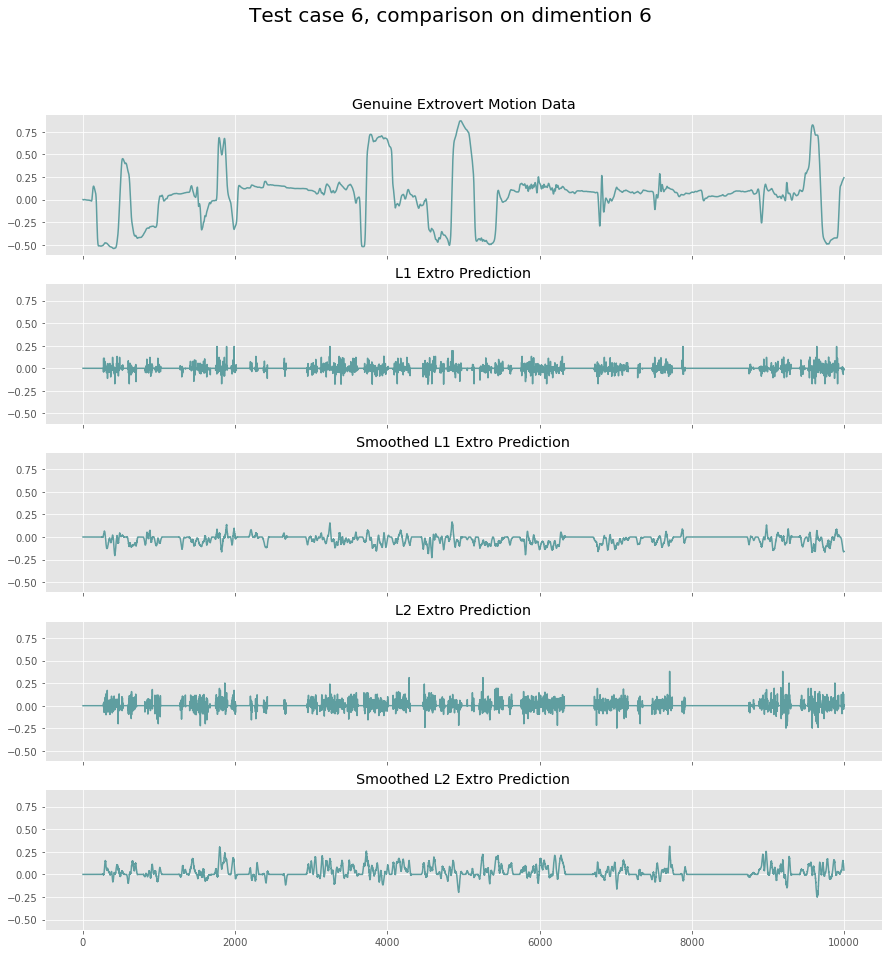

In [23]:
for i in range(1,7):

    genuine_motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    L1_extro = np.loadtxt("Predictions/300dL1/extro_L1_{0}.txt".format(i), usecols=range(0, 6))
    L1_smooth_extro = np.loadtxt("Predictions/300dL1/extro_L1_smooth_{0}.txt".format(i), usecols=range(0, 6))
    L2_extro = np.loadtxt("Predictions/300dL2/extro_L2_{0}.txt".format(i), usecols=range(0, 6))
    L2_smooth_extro = np.loadtxt("Predictions/300dL2/extro_L2_smooth_{0}.txt".format(i), usecols=range(0, 6))
    
    f, axarr = plt.subplots(5, sharex=True, sharey=True, figsize=(15,15))
    
    axarr[0].plot(genuine_motion_data[:10000,i-1], color = 'cadetblue')
    axarr[0].set_title('Genuine Extrovert Motion Data')
    
    axarr[1].plot(L1_extro[:10000,i-1], color = 'cadetblue')
    axarr[1].set_title('L1 Extro Prediction')
    
    axarr[2].plot(L1_smooth_extro[:10000,i-1], color = 'cadetblue')
    axarr[2].set_title('Smoothed L1 Extro Prediction')   
    
    axarr[3].plot(L2_extro[:10000,i-1], color = 'cadetblue')
    axarr[3].set_title('L2 Extro Prediction')

    axarr[4].plot(L2_smooth_extro[:10000,i-1], color = 'cadetblue')
    axarr[4].set_title('Smoothed L2 Extro Prediction')
    
    plt.suptitle('Test case {0}, comparison on dimention {1}'.format(i, i), size = 20)
    plt.savefig('Extro case {0} dim {1}.pdf'.format(i, i))
    plt.show()

## Try Gaussian filters

In [34]:
def gaussian_smooth(raw_prediction, sigma):

    raw_transpose = raw_prediction.transpose()
    output = np.zeros(raw_transpose.shape)
    
    for i in range(output.shape[0]):
        output[i] = gaussian_filter(raw_transpose[i], sigma)
    
    output = output.transpose()
    
    return output

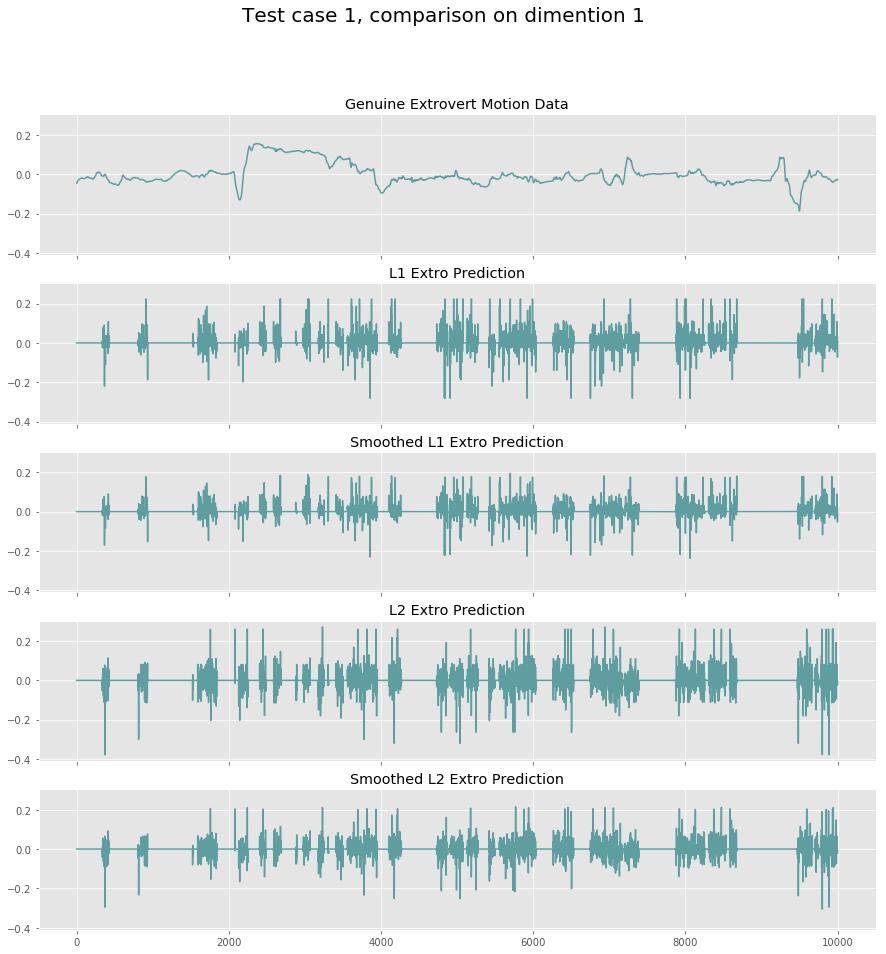

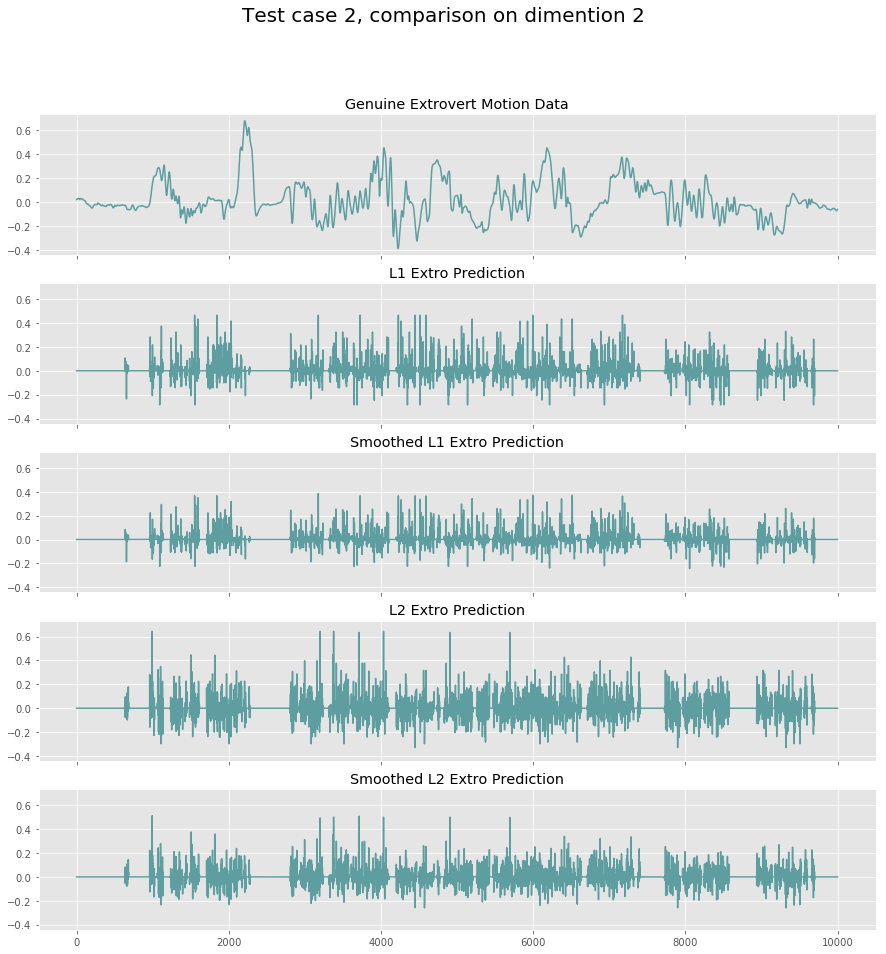

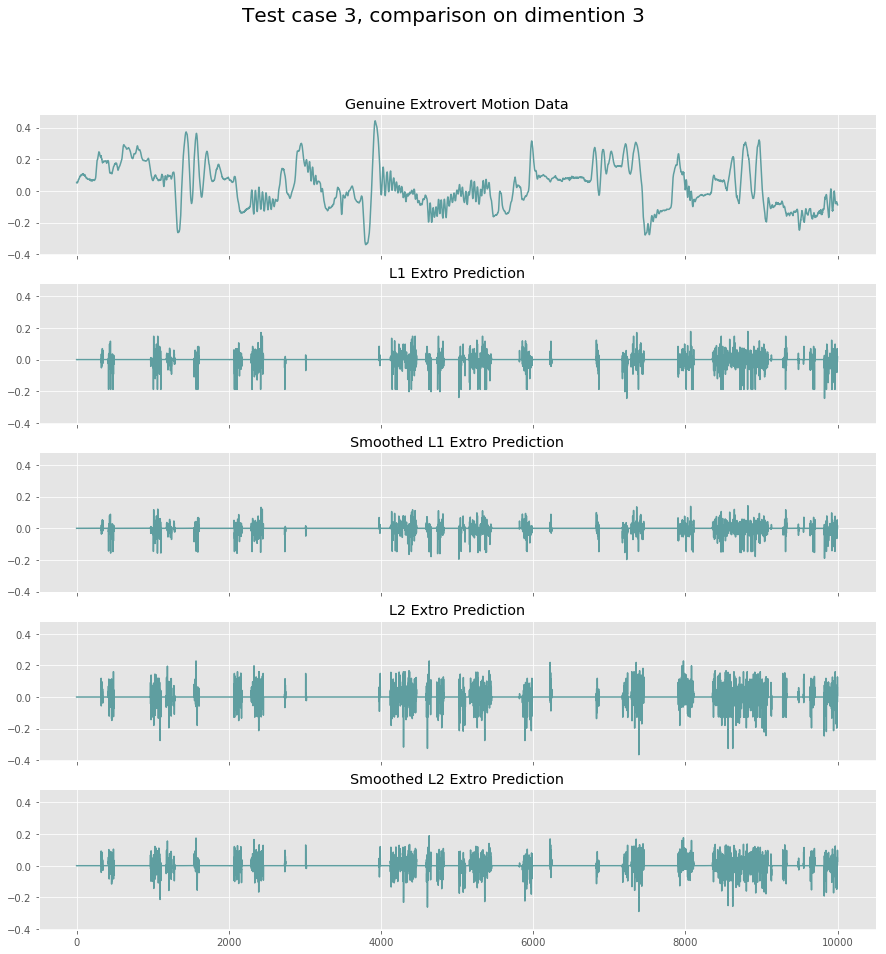

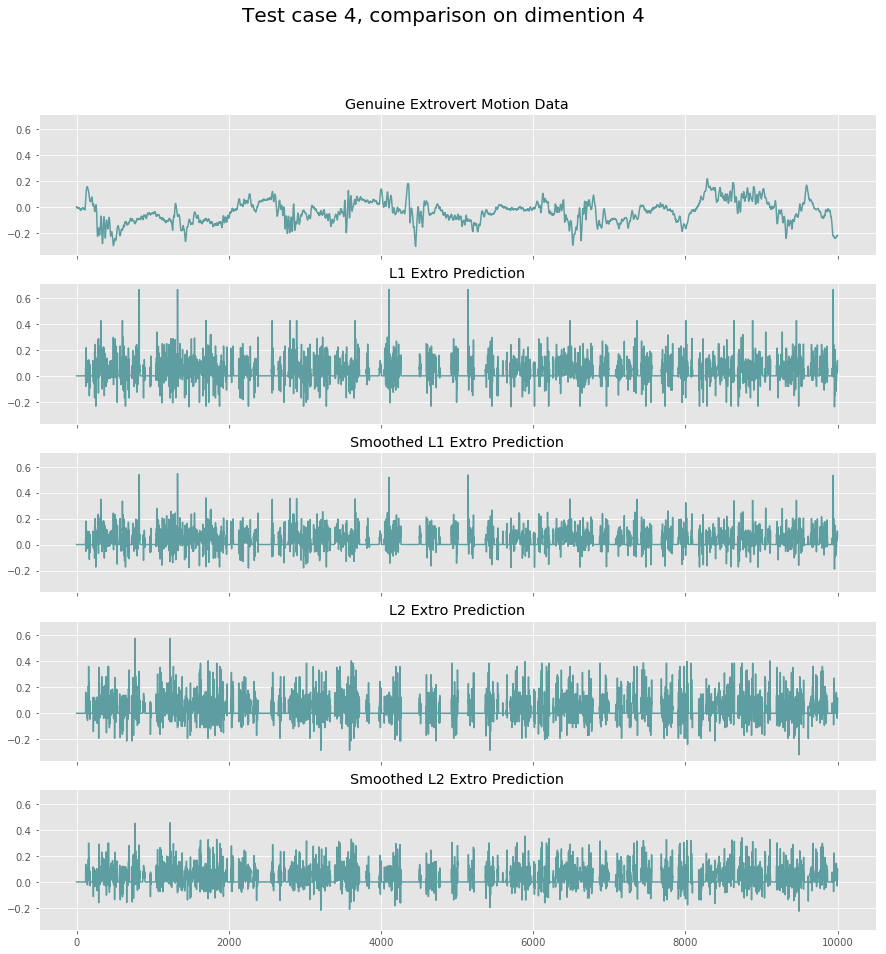

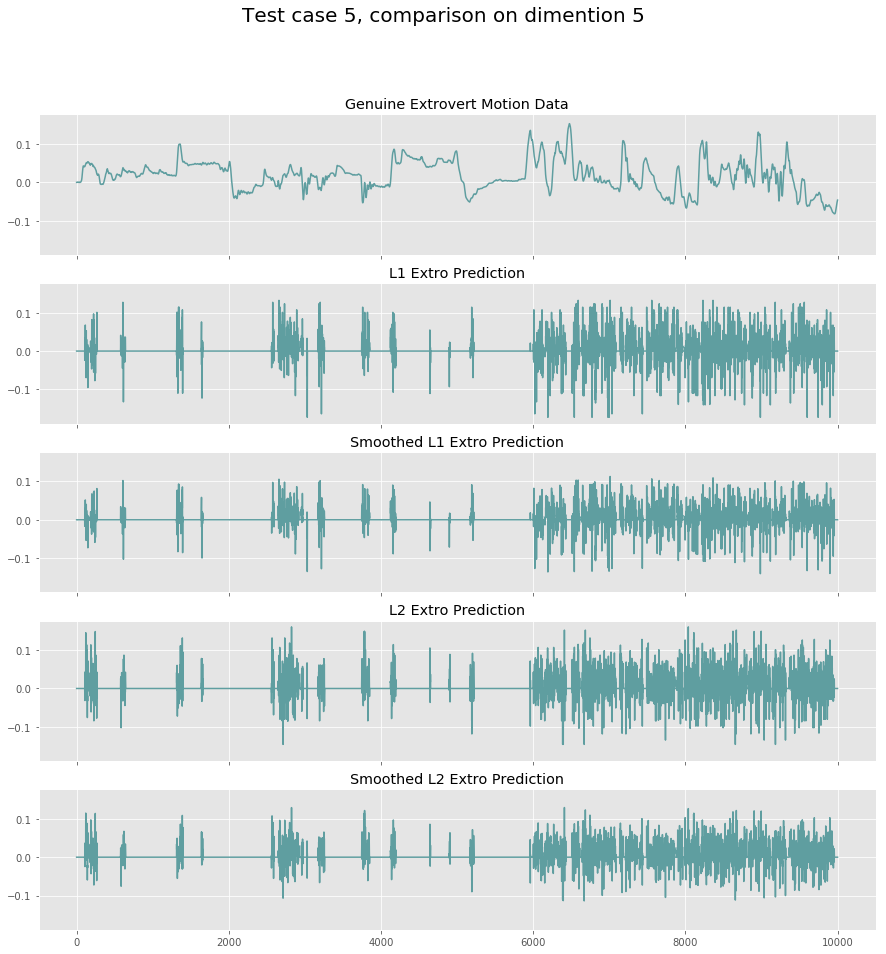

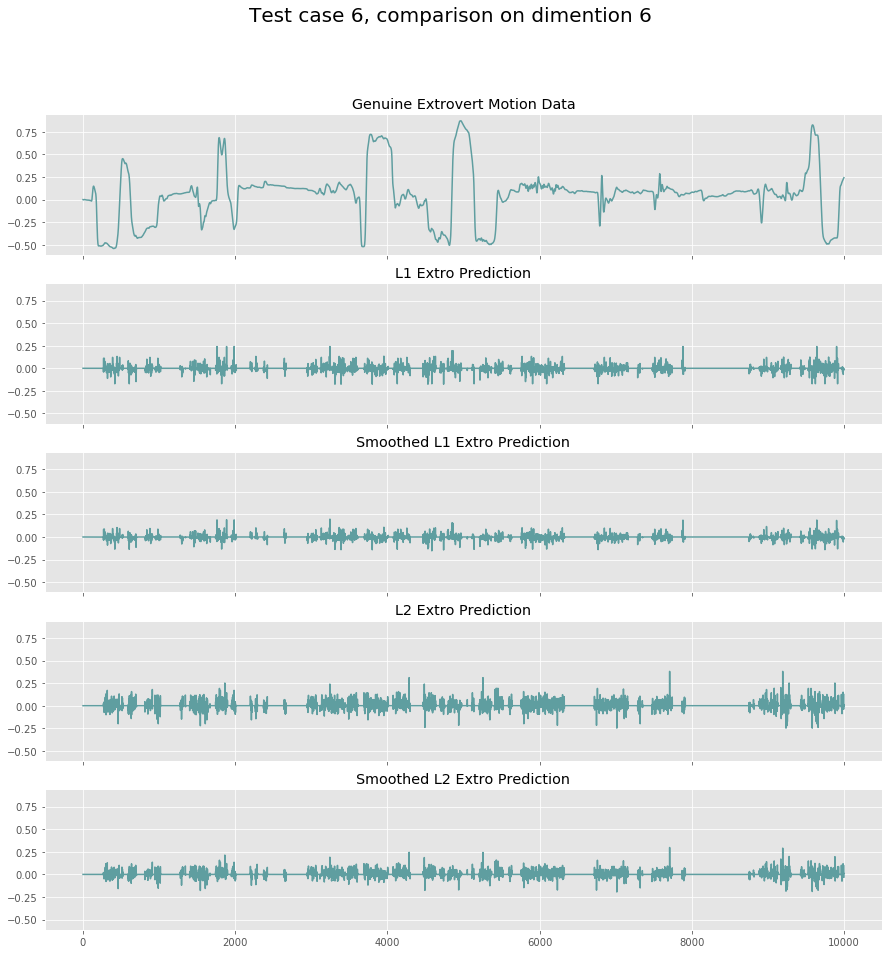

In [35]:
for i in range(1,7):
    genuine_motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0,6))
    L1_extro = np.loadtxt("Predictions/300dL1/extro_L1_{0}.txt".format(i), usecols=range(0,6))
    L1_smooth_extro = gaussian_smooth(L1_extro, 0.5)
    
    L2_extro = np.loadtxt("Predictions/300dL2/extro_L2_{0}.txt".format(i), usecols=range(0, 6))
    L2_smooth_extro = gaussian_smooth(L2_extro, 0.5)
    
    f, axarr = plt.subplots(5, sharex=True, sharey=True, figsize=(15,15))
    
    axarr[0].plot(genuine_motion_data[:10000,i-1], color = 'cadetblue')
    axarr[0].set_title('Genuine Extrovert Motion Data')
    
    axarr[1].plot(L1_extro[:10000,i-1], color = 'cadetblue')
    axarr[1].set_title('L1 Extro Prediction')
    
    axarr[2].plot(L1_smooth_extro[:10000,i-1], color = 'cadetblue')
    axarr[2].set_title('Smoothed L1 Extro Prediction')   
    
    axarr[3].plot(L2_extro[:10000,i-1], color = 'cadetblue')
    axarr[3].set_title('L2 Extro Prediction')

    axarr[4].plot(L2_smooth_extro[:10000,i-1], color = 'cadetblue')
    axarr[4].set_title('Smoothed L2 Extro Prediction')
    
    plt.suptitle('Test case {0}, comparison on dimention {1}'.format(i, i), size = 20)
    #plt.savefig('Extro case {0} dim {1}.pdf'.format(i, i))
    plt.show()

## Inspect on fake extrovert model (trained on intro training set)

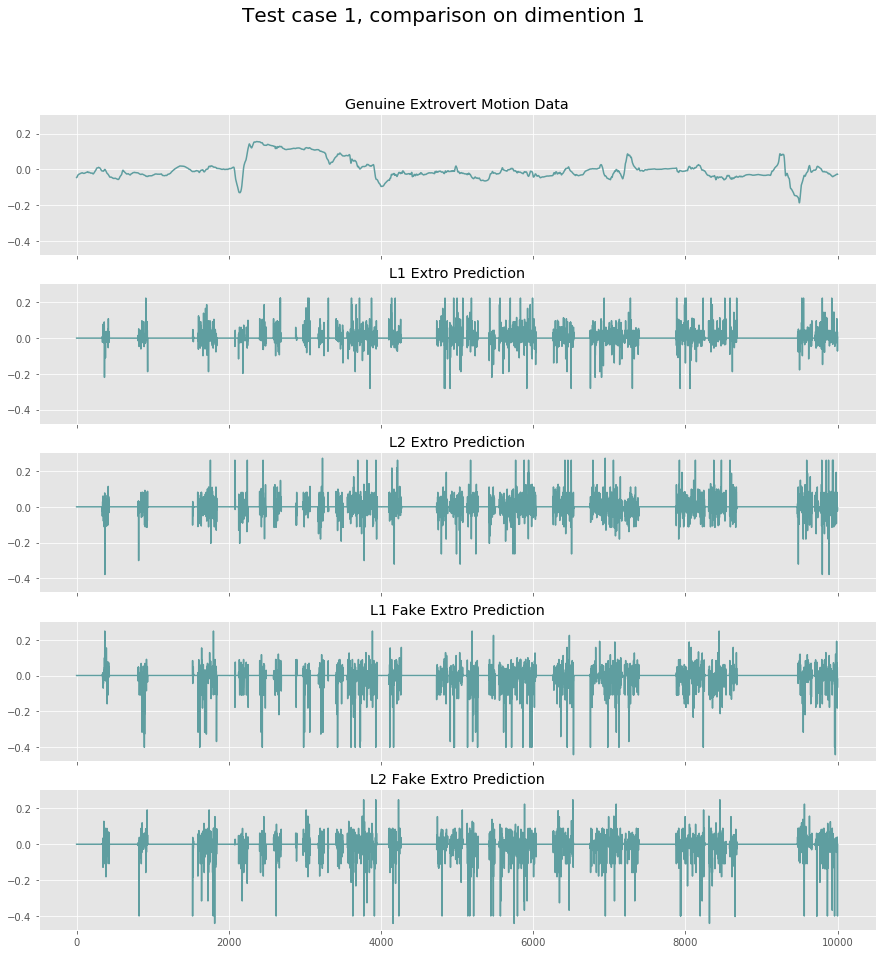

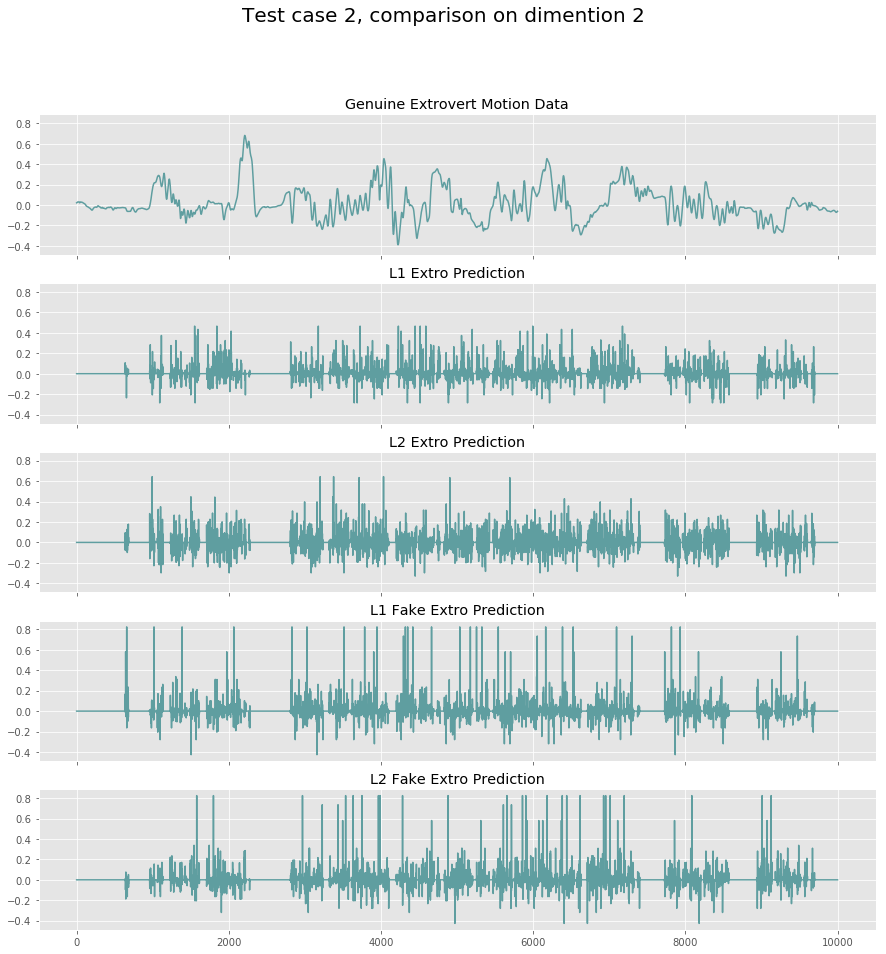

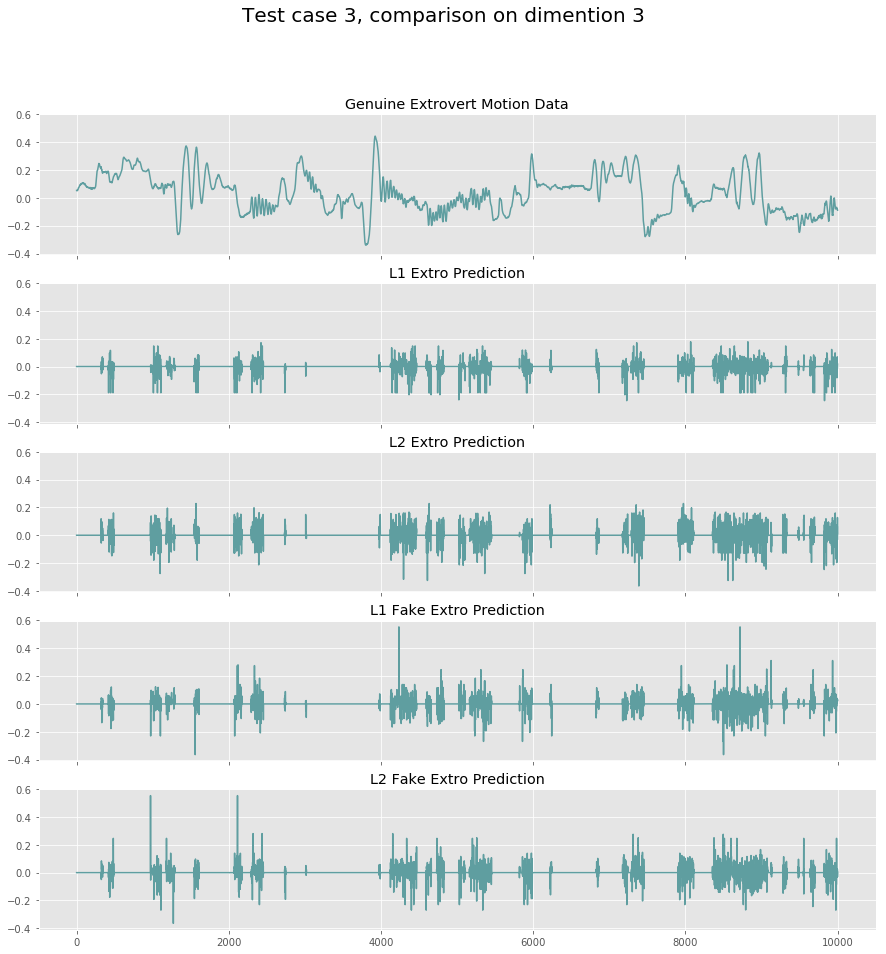

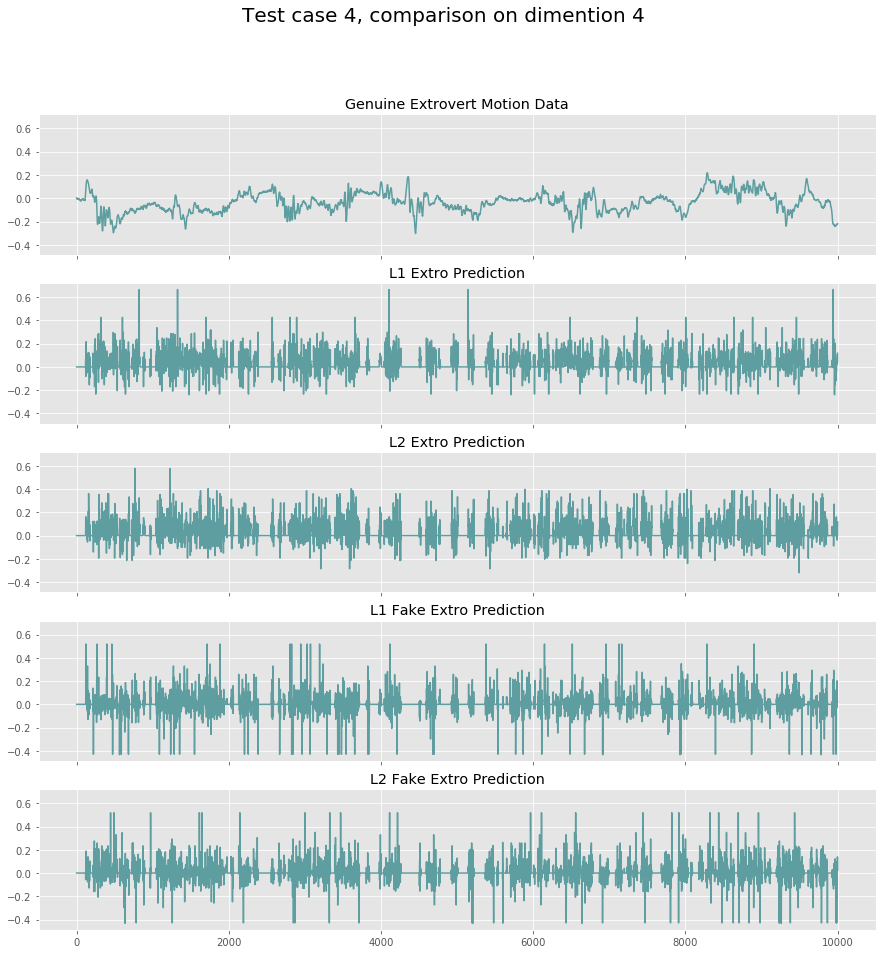

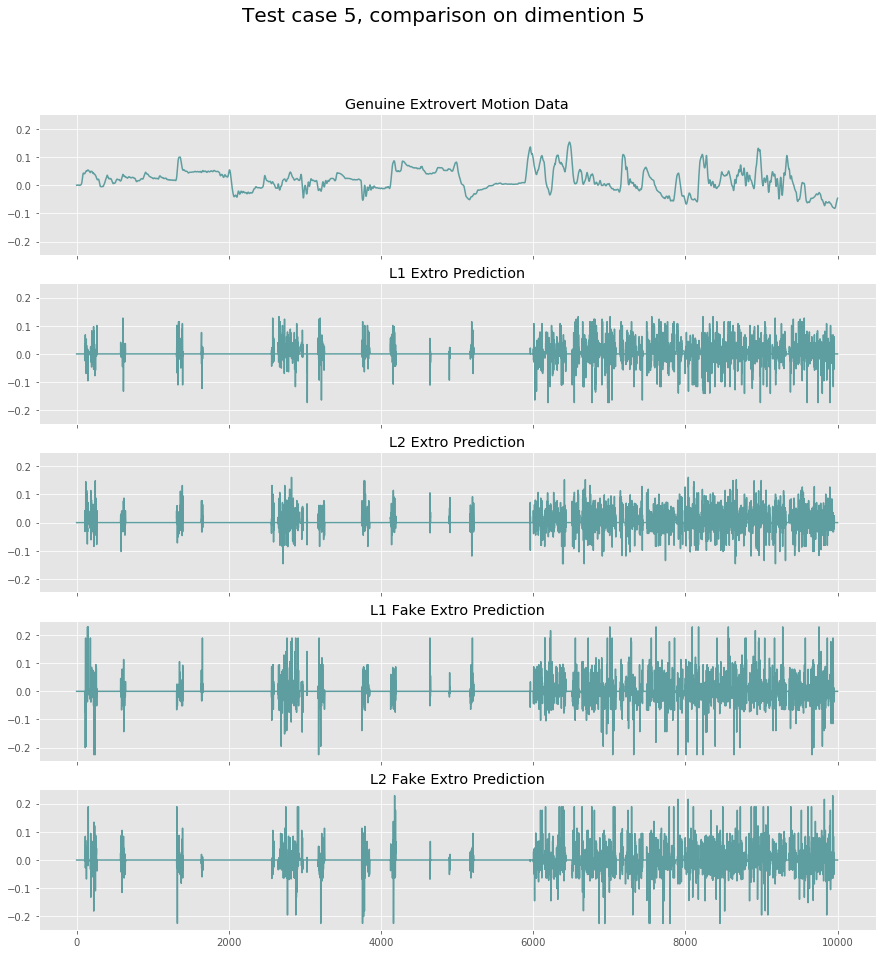

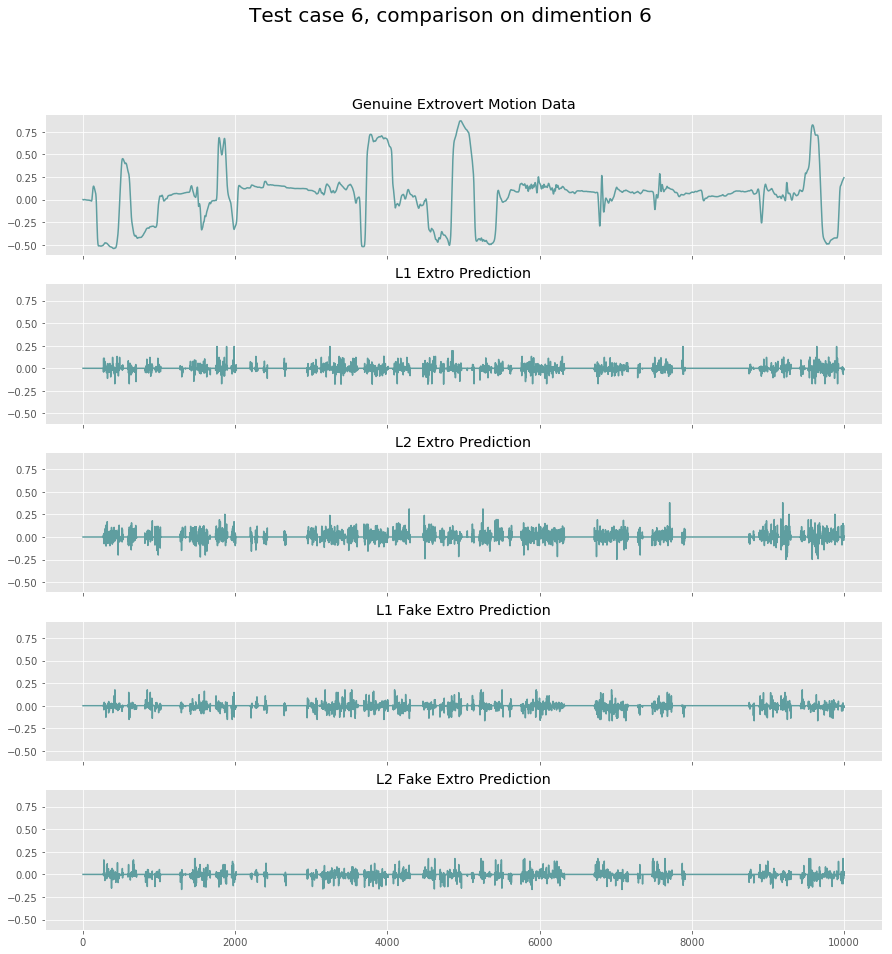

In [20]:
for i in range(1,7):

    genuine_motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    L1_extro = np.loadtxt("Predictions/300dL1/extro_L1_{0}.txt".format(i), usecols=range(0, 6))
    L2_extro = np.loadtxt("Predictions/300dL2/extro_L2_{0}.txt".format(i), usecols=range(0, 6))
    L1_fake_extro = np.loadtxt("Predictions/300dL1/fake_extro_L1_{0}.txt".format(i), usecols=range(0, 6))
    L2_fake_extro = np.loadtxt("Predictions/300dL2/fake_extro_L2_{0}.txt".format(i), usecols=range(0, 6))
    
    f, axarr = plt.subplots(5, sharex=True, sharey=True, figsize=(15,15))
    
    axarr[0].plot(genuine_motion_data[:10000,i-1], color = 'cadetblue')
    axarr[0].set_title('Genuine Extrovert Motion Data')
    
    axarr[1].plot(L1_extro[:10000,i-1], color = 'cadetblue')
    #axarr[1].set_title('Smoothed L1 Extro Prediction')
    axarr[1].set_title('L1 Extro Prediction')
    
    axarr[2].plot(L2_extro[:10000,i-1], color = 'cadetblue')
    #axarr[2].set_title('Smoothed L2 Extro Prediction')   
    axarr[2].set_title('L2 Extro Prediction')   
    
    axarr[3].plot(L1_fake_extro[:10000,i-1], color = 'cadetblue')
    #axarr[3].set_title('Smoothed L1 Fake Extro Prediction')
    axarr[3].set_title('L1 Fake Extro Prediction')

    axarr[4].plot(L2_fake_extro[:10000,i-1], color = 'cadetblue')
    #axarr[4].set_title('Smoothed L2 Fake Extro Prediction')
    axarr[4].set_title('L2 Fake Extro Prediction')
    
    plt.suptitle('Test case {0}, comparison on dimention {1}'.format(i, i), size = 20)
    plt.savefig('Fake_extro case {0} dim {1}.pdf'.format(i, i))
    plt.show()

## Inspect Introvert data, how different is it from extro?

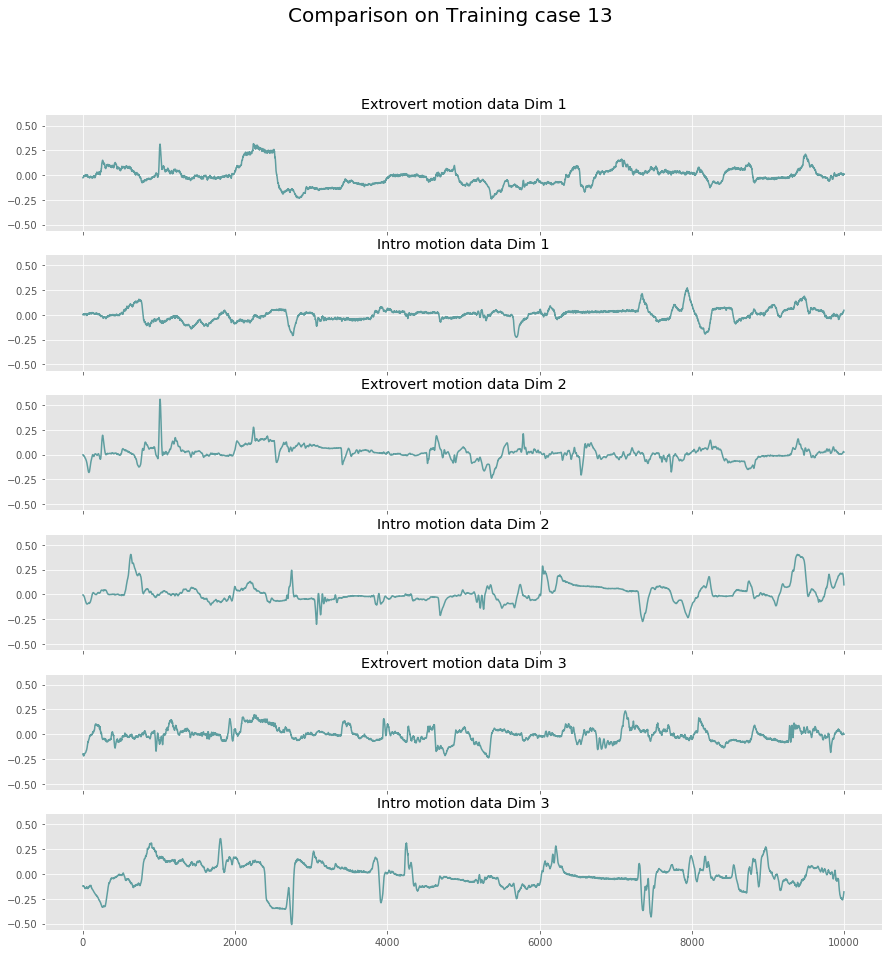

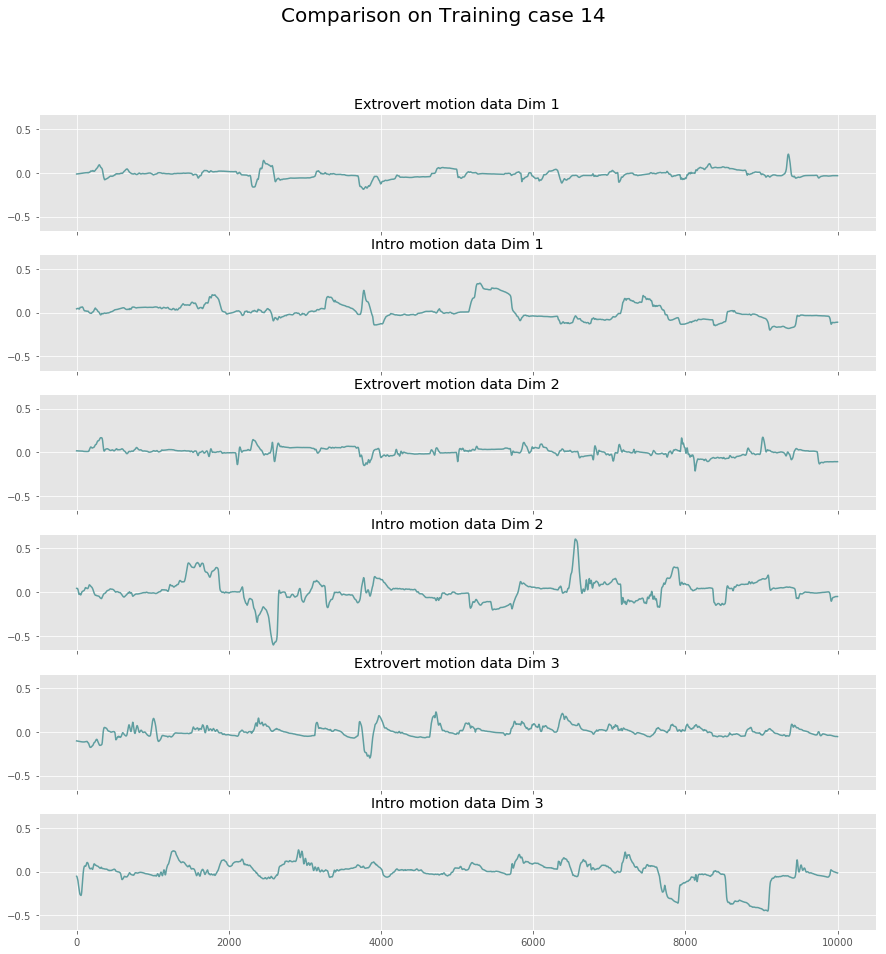

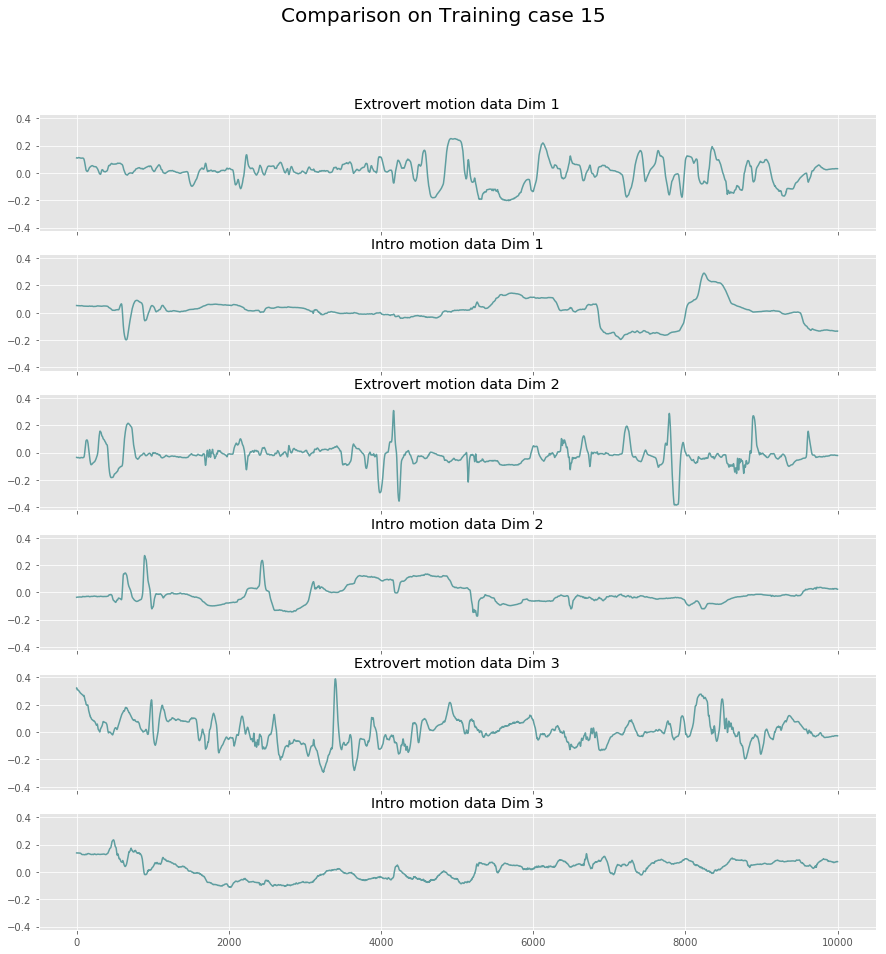

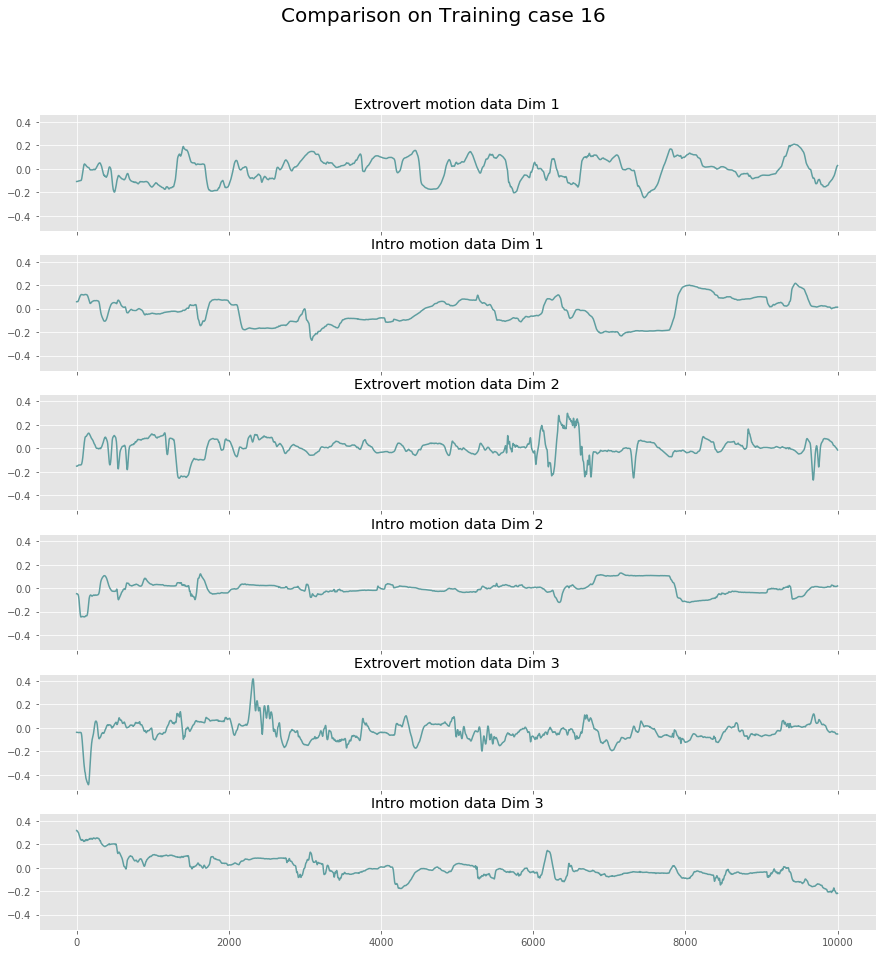

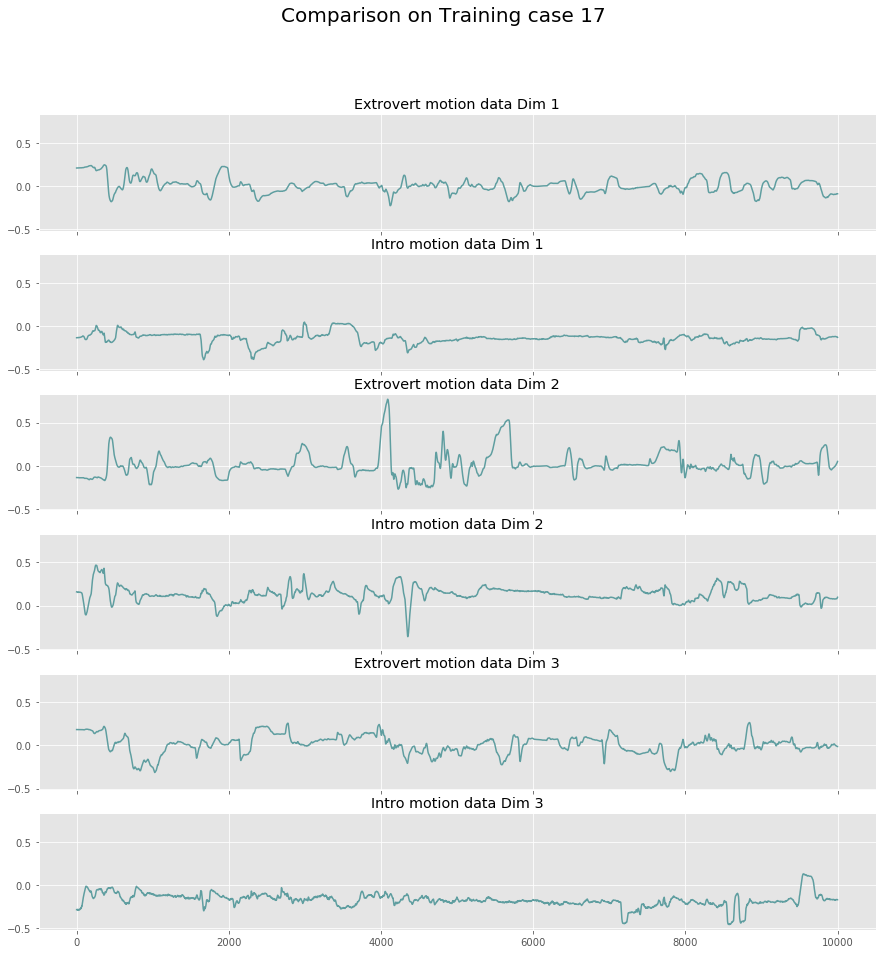

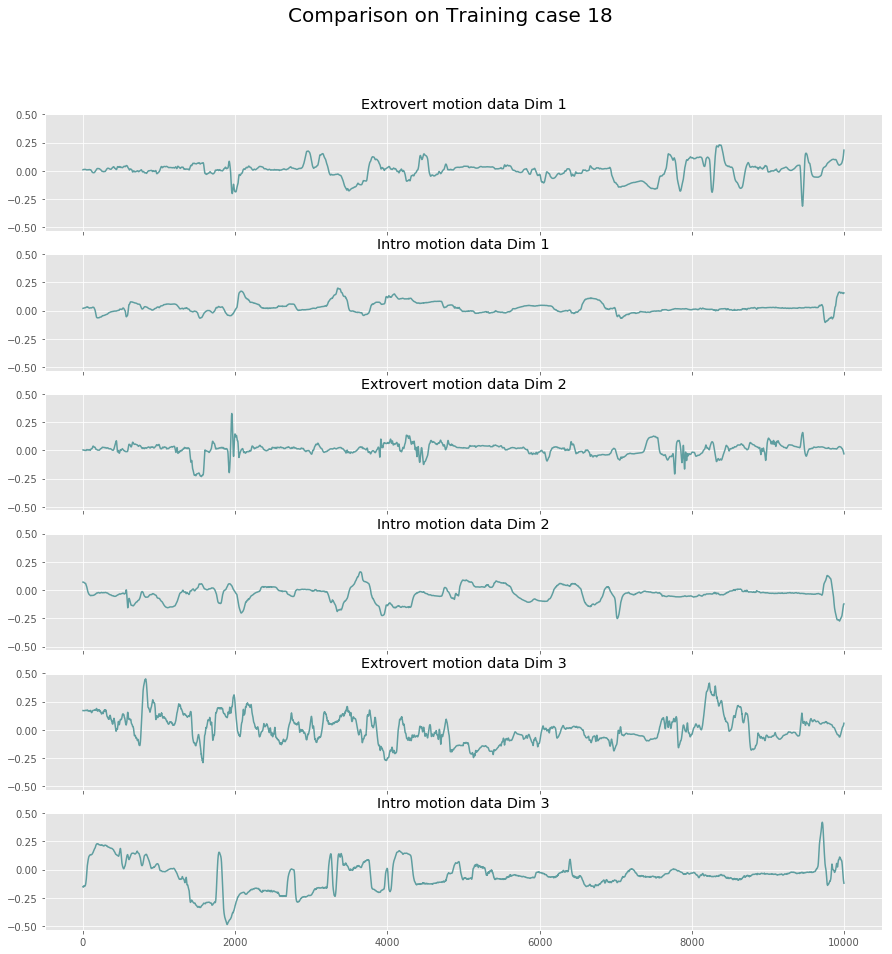

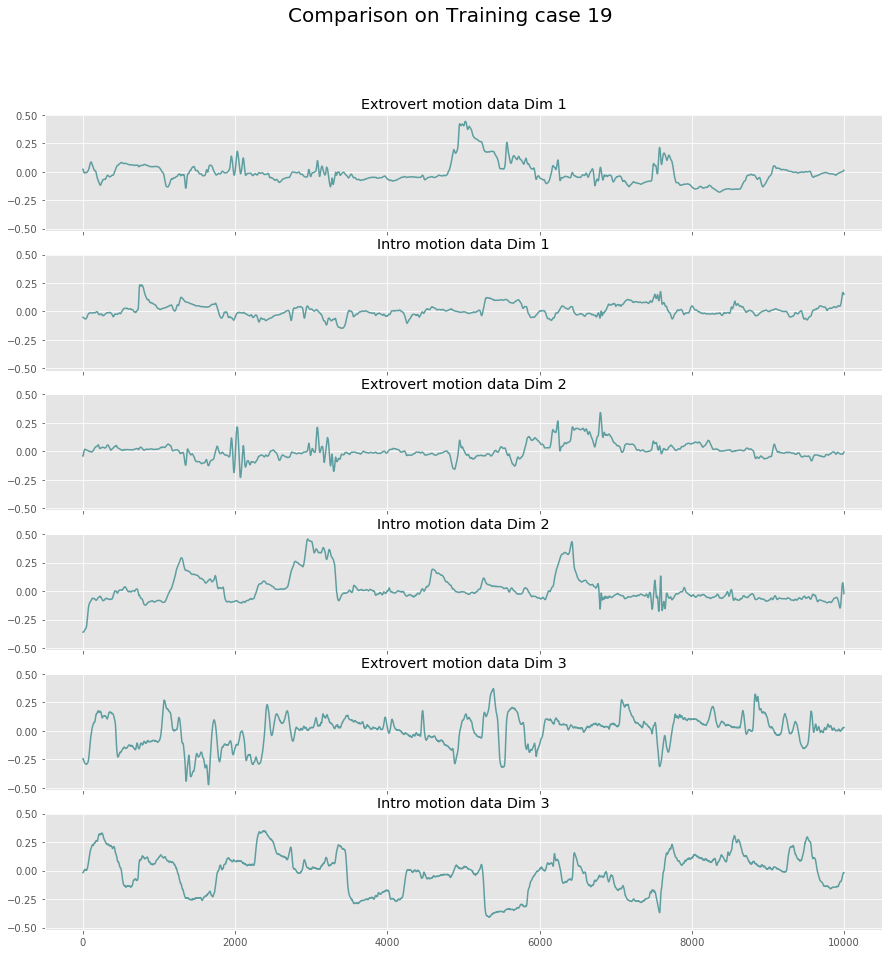

In [22]:
for i in range(13,20):

    extro_motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    intro_motion_data = np.loadtxt("IntrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))

    f, axarr = plt.subplots(6, sharex=True, sharey=True, figsize=(15,15))
    
    axarr[0].plot(extro_motion_data[:10000,0], color = 'cadetblue')
    axarr[0].set_title('Extrovert motion data Dim 1')
    
    axarr[1].plot(intro_motion_data[:10000,0], color = 'cadetblue')
    axarr[1].set_title('Intro motion data Dim 1')
    
    axarr[2].plot(extro_motion_data[:10000,1], color = 'cadetblue')
    axarr[2].set_title('Extrovert motion data Dim 2')
    
    axarr[3].plot(intro_motion_data[:10000,1], color = 'cadetblue')
    axarr[3].set_title('Intro motion data Dim 2')
    
    axarr[4].plot(extro_motion_data[:10000,2], color = 'cadetblue')
    axarr[4].set_title('Extrovert motion data Dim 3')
    
    axarr[5].plot(intro_motion_data[:10000,2], color = 'cadetblue')
    axarr[5].set_title('Intro motion data Dim 3')

    plt.suptitle('Comparison on Training case {}'.format(i), size = 20)
    plt.savefig('ExtroIntro comparison on Training Case {}.pdf'.format(i))
    plt.show()